In [1]:
!pip install seaborn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import datetime as at
import statistics as s
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns # Import seaborn for plotting
from statsmodels.stats.weightstats import ztest
from sklearn.ensemble import RandomForestRegressor
import statsmodels.formula.api as sm
from scipy import stats

In [3]:
df =pd.read_csv("D:/MDTM27/capstone project/car dekho1/car.csv")
df

,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,feature_6,feature_7,feature_8,feature_9,Mileage,Engine,Max Power,Torque,Wheel Size,car_links
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,NaN,23.1 kmpl,998 CC,67.04bhp,90Nm,NaN,https://www.cardekho.com/used-car-details/used...
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,17 kmpl,1497 CC,121.31bhp,150Nm,16,https://www.cardekho.com/buy-used-car-details/...
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,23.84 kmpl,1199 CC,84bhp,114Nm,14,https://www.cardekho.com/used-car-details/used...
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,14,https://www.cardekho.com/buy-used-car-details/...
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Radio,23.65 kmpl,1248 CC,88.5bhp,200Nm,16,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,...,Power Adjustable Exterior Rear View Mirror,Anti Lock Braking System,Centeral Locking,Radio,25.24 kmpl,998 CC,65.71bhp,89Nm,NaN,https://www.cardekho.com/used-car-details/used...
8365,Kolkata,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Manually Adjustable Exterior Rear View Mirror,Day Night Rear View Mirror,Passenger Side Rear View Mirror,NaN,22.74 kmpl,796 CC,47.3bhp,69Nm,NaN,https://www.cardekho.com/used-car-details/used...
8366,Kolkata,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Fog Lights Front,Anti Lock Braking System,Brake Assist,Cd Player,11.74 kmpl,1796 CC,186bhp,285Nm,17,https://www.cardekho.com/used-car-details/used...
8367,Kolkata,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,18.5 kmpl,1197 CC,85.80bhp,114Nm,14,https://www.cardekho.com/used-car-details/used...


In [4]:
df = df.drop_duplicates()
df


,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,feature_6,feature_7,feature_8,feature_9,Mileage,Engine,Max Power,Torque,Wheel Size,car_links
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,NaN,23.1 kmpl,998 CC,67.04bhp,90Nm,NaN,https://www.cardekho.com/used-car-details/used...
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,17 kmpl,1497 CC,121.31bhp,150Nm,16,https://www.cardekho.com/buy-used-car-details/...
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,23.84 kmpl,1199 CC,84bhp,114Nm,14,https://www.cardekho.com/used-car-details/used...
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,14,https://www.cardekho.com/buy-used-car-details/...
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Radio,23.65 kmpl,1248 CC,88.5bhp,200Nm,16,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,"10,000",Manual,1,1st Owner,Maruti,Maruti Celerio,...,Power Adjustable Exterior Rear View Mirror,Anti Lock Braking System,Centeral Locking,Radio,25.24 kmpl,998 CC,65.71bhp,89Nm,NaN,https://www.cardekho.com/used-car-details/used...
8365,Kolkata,0,Petrol,Hatchback,"1,20,000",Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Manually Adjustable Exterior Rear View Mirror,Day Night Rear View Mirror,Passenger Side Rear View Mirror,NaN,22.74 kmpl,796 CC,47.3bhp,69Nm,NaN,https://www.cardekho.com/used-car-details/used...
8366,Kolkata,0,Petrol,Sedan,"50,000",Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Fog Lights Front,Anti Lock Braking System,Brake Assist,Cd Player,11.74 kmpl,1796 CC,186bhp,285Nm,17,https://www.cardekho.com/used-car-details/used...
8367,Kolkata,0,Petrol,Hatchback,"40,000",Manual,1,1st Owner,Maruti,Maruti Ritz,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,18.5 kmpl,1197 CC,85.80bhp,114Nm,14,https://www.cardekho.com/used-car-details/used...


In [5]:
# Loop through all columns and check or convert the data types as needed
for column in df.columns:
   
    if df[column].dtype == 'object':
        try:
        
            df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='ignore')
        except:
            pass


In [6]:
df.dtypes

City                    object
it                       int64
ft                      object
bt                      object
km                       int64
transmission            object
ownerNo                  int64
owner                   object
oem                     object
model                   object
modelYear                int64
centralVariantId         int64
variantName             object
price                   object
priceActual             object
priceSaving            float64
priceFixedText         float64
trendingText            object
Registration Year       object
Insurance Validity      object
Fuel Type               object
Kms Driven              object
RTO                     object
Ownership               object
Engine Displacement     object
Transmission            object
Year of Manufacture    float64
feature_1               object
feature_2               object
feature_3               object
feature_4               object
feature_5               object
feature_

In [7]:
numeric_features = ['Engine Displacement', 'Mileage','Max Power', 'Torque', 'Wheel Size', 'Year of Manufacture','price', 'Engine']
categorical_features = ['it', 'ft', 'bt', 'km', 'transmission', 'owner', 'oem', 'model',
                     'variantName', 'Registration Year',
                        'Insurance Validity', 'Fuel Type', 'Ownership', 'Transmission',
                        'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
                        'feature_6', 'feature_7', 'feature_8', 'feature_9']

In [8]:
df.dtypes

City                    object
it                       int64
ft                      object
bt                      object
km                       int64
transmission            object
ownerNo                  int64
owner                   object
oem                     object
model                   object
modelYear                int64
centralVariantId         int64
variantName             object
price                   object
priceActual             object
priceSaving            float64
priceFixedText         float64
trendingText            object
Registration Year       object
Insurance Validity      object
Fuel Type               object
Kms Driven              object
RTO                     object
Ownership               object
Engine Displacement     object
Transmission            object
Year of Manufacture    float64
feature_1               object
feature_2               object
feature_3               object
feature_4               object
feature_5               object
feature_

In [ ]:
#preprocessing for "km"

# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean,median

df['km'] = df['km'].str.replace('[^0-9]', '', regex=True)

df['km'] = pd.to_numeric(df['km'], errors='coerce')

df['km'].fillna(0, inplace=True)  

df['km'] = df['km'].astype(int)

mean_displacement = df['km'].mean()
median_displacement = df['km'].median()

df['km'].fillna(mean_displacement, inplace=True)
df['km'].fillna(median_displacement, inplace=True)
df['km']


In [10]:
#  preprocessing for df["ownerNo"] columns
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean,median


df['ownerNo'] = df['ownerNo'].astype(str)

df['ownerNo'] = df['ownerNo'].str.replace('[^0-9]', '', regex=True)

df['ownerNo'] = pd.to_numeric(df['ownerNo'], errors='coerce')

df['ownerNo'].fillna(0, inplace=True)  

df['ownerNo'] = df['ownerNo'].astype(int)

mean_displacement = df['ownerNo'].mean()

median_displacement = df['ownerNo'].median()


# Impute missing values with the mean
df['ownerNo'].fillna(mean_displacement, inplace=True)
df['ownerNo'].fillna(median_displacement, inplace=True)
df['ownerNo']

0       3
1       2
2       1
3       1
4       1
       ..
8364    1
8365    1
8366    3
8367    1
8368    2
Name: ownerNo, Length: 8369, dtype: int32

In [11]:
# modelYear

# Preprocessing for df["modelYear"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['modelYear'] = df['modelYear'].astype(str)

df['modelYear'] = df['modelYear'].str.replace('[^0-9]', '', regex=True)

df['modelYear'] = pd.to_numeric(df['modelYear'], errors='coerce')

df['modelYear'].fillna(0, inplace=True)

df['modelYear'] = df['modelYear'].astype(int)

mean_modelYear = df['modelYear'].mean()
median_modelYear = df['modelYear'].median()

# Impute missing values with the mean
df['modelYear'].fillna(mean_modelYear, inplace=True)
df['modelYear'].fillna(median_modelYear, inplace=True)

df['modelYear']


0       2015
1       2018
2       2018
3       2014
4       2015
        ... 
8364    2022
8365    2014
8366    2011
8367    2012
8368    2017
Name: modelYear, Length: 8369, dtype: int32

In [12]:
#  centralVariantId

# Preprocessing for df["centralVariantId"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['centralVariantId'] = df['centralVariantId'].astype(str)

df['centralVariantId'] = df['centralVariantId'].str.replace('[^0-9]', '', regex=True)

df['centralVariantId'] = pd.to_numeric(df['centralVariantId'], errors='coerce')

df['centralVariantId'].fillna(0, inplace=True)

df['centralVariantId'] = df['centralVariantId'].astype(int)

mean_centralVariantId = df['centralVariantId'].mean()
median_centralVariantId = df['centralVariantId'].median()

# Impute missing values with the mean
df['centralVariantId'].fillna(mean_centralVariantId, inplace=True)
df['centralVariantId'].fillna(median_centralVariantId, inplace=True)

df['centralVariantId']


0       3979
1       6087
2       2983
3       1867
4       4277
        ... 
8364    8682
8365    3943
8366    4672
8367    4144
8368    5048
Name: centralVariantId, Length: 8369, dtype: int32

In [13]:
#  price

# Preprocessing for df["price"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['price'] = df['price'].astype(str)

df['price'] = df['price'].str.replace('[^0-9]', '', regex=True)

df['price'] = pd.to_numeric(df['price'], errors='coerce')

df['price'].fillna(0, inplace=True)

df['price'] = df['price'].astype(int)

mean_price = df['price'].mean()
median_price = df['price'].median()

# Impute missing values with the mean
df['price'].fillna(mean_price, inplace=True)
df['price'].fillna(median_price, inplace=True)

df['price']


0         4
1       811
2       585
3       462
4       790
       ... 
8364    510
8365    180
8366    550
8367    140
8368      5
Name: price, Length: 8369, dtype: int32

In [14]:
# Convert the 'price' column to string
df['price'] = df['price'].astype(str)

# Filter rows that contain 'lakh', 'crore', and commas
lakh_df = df[df['price'].str.contains('lakh', case=False, na=False)]
crore_df = df[df['price'].str.contains('crore', case=False, na=False)]
thousand_df = df[df['price'].str.contains(',')]

# Now you can access the 'price' column safely
thousand_df['price'], df['price'], crore_df['price']


(Series([], Name: price, dtype: object),
 0         4
 1       811
 2       585
 3       462
 4       790
        ... 
 8364    510
 8365    180
 8366    550
 8367    140
 8368      5
 Name: price, Length: 8369, dtype: object,
 Series([], Name: price, dtype: object))

0

In [21]:
# priceActual

# Preprocessing for df["priceActual"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['priceActual'] = df['priceActual'].astype(str)

df['priceActual'] = df['priceActual'].str.replace('[^0-9]', '', regex=True)

df['priceActual'] = pd.to_numeric(df['priceActual'], errors='coerce')

df['priceActual'].fillna(0, inplace=True)

df['priceActual'] = df['priceActual'].astype(int)

mean_priceActual = df['priceActual'].mean()
median_priceActual = df['priceActual'].median()

# Impute missing values with the mean
df['priceActual'].fillna(mean_priceActual, inplace=True)
df['priceActual'].fillna(median_priceActual, inplace=True)

df['priceActual']


0       0
1       0
2       0
3       0
4       0
       ..
8364    0
8365    0
8366    0
8367    0
8368    0
Name: priceActual, Length: 8369, dtype: int32

In [22]:

df['priceActual'].iloc[20:30]

20      0
21      0
22      0
23      0
24      0
25      0
26    585
27      0
28      0
29      0
Name: priceActual, dtype: int32

In [23]:
#  Registration Year

# Preprocessing for df["RegistrationYear"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['Registration Year'] = df['Registration Year'].astype(str)

df['Registration Year'] = df['Registration Year'].str.replace('[^0-9]', '', regex=True)

df['Registration Year'] = pd.to_numeric(df['Registration Year'], errors='coerce')

df['Registration Year'].fillna(0, inplace=True)

df['Registration Year'] = df['Registration Year'].astype(int)

mean_Registration_Year = df['Registration Year'].mean()
median_Registration_Year = df['Registration Year'].median()

# Impute missing values with the mean
df['Registration Year'].fillna(mean_Registration_Year, inplace=True)
df['Registration Year'].fillna(median_Registration_Year, inplace=True)

df['Registration Year']


0       2015
1         18
2         18
3         14
4       2015
        ... 
8364    2022
8365    2014
8366    2011
8367    2012
8368    2017
Name: Registration Year, Length: 8369, dtype: int32

In [24]:
#  Kms Driven

# Preprocessing for df["Kms Driven"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['Kms Driven'] = df['Kms Driven'].astype(str)

df['Kms Driven'] = df['Kms Driven'].str.replace('[^0-9]', '', regex=True)

df['Kms Driven'] = pd.to_numeric(df['Kms Driven'], errors='coerce')

df['Kms Driven'].fillna(0, inplace=True)

df['Kms Driven'] = df['Kms Driven'].astype(int)

mean_Kms_Driven = df['Kms Driven'].mean()
median_Kms_Driven = df['Kms Driven'].median()

# Impute missing values with the mean
df['Kms Driven'].fillna(mean_Kms_Driven, inplace=True)
df['Kms Driven'].fillna(median_Kms_Driven, inplace=True)

df['Kms Driven']


0       120000
1        32706
2        11949
3        17794
4        60000
         ...  
8364     10000
8365    120000
8366     50000
8367     40000
8368    120000
Name: Kms Driven, Length: 8369, dtype: int32

In [25]:
df['RTO'].fillna('Unknown', inplace=True) 
print(df['RTO'].value_counts())

RTO
Unknown    894
WB02       452
RJ14       367
TS07       282
TS08       244
          ... 
HR24         1
HR78         1
HR35         1
HR14         1
WB72         1
Name: count, Length: 465, dtype: int64


In [26]:
# s Engine Displacement

# Preprocessing for df["Engine Displacement"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['Engine Displacement'] = df['Engine Displacement'].astype(str)

df['Engine Displacement'] = df['Engine Displacement'].str.replace('[^0-9]', '', regex=True)

df['Engine Displacement'] = pd.to_numeric(df['Engine Displacement'], errors='coerce')

df['Engine Displacement'].fillna(0, inplace=True)

df['Engine Displacement'] = df['Engine Displacement'].astype(int)

mean_Engine_Displacement = df['Engine Displacement'].mean()
median_Engine_Displacement = df['Engine Displacement'].median()

# Impute missing values with the mean
df['Engine Displacement'].fillna(mean_Engine_Displacement, inplace=True)
df['Engine Displacement'].fillna(median_Engine_Displacement, inplace=True)

df['Engine Displacement']


0        998
1       1497
2       1199
3       1197
4       1248
        ... 
8364     998
8365     796
8366    1796
8367    1197
8368    1461
Name: Engine Displacement, Length: 8369, dtype: int32

In [27]:


# Preprocessing for df["Year of Manufacture"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['Year of Manufacture'] = df['Year of Manufacture'].astype(str)

df['Year of Manufacture'] = df['Year of Manufacture'].str.replace('[^0-9]', '', regex=True)
df['Year of Manufacture'] = df['Year of Manufacture'].str[:-1]
df['Year of Manufacture'] = pd.to_numeric(df['Year of Manufacture'], errors='coerce')

df['Year of Manufacture'].fillna(0, inplace=True)

df['Year of Manufacture'] = df['Year of Manufacture'].astype(int)

mean_Year_of_Manufacture = df['Year of Manufacture'].mean()
median_Year_of_Manufacture = df['Year of Manufacture'].median()

# Impute missing values with the mean
df['Year of Manufacture'].fillna(mean_Year_of_Manufacture, inplace=True)
df['Year of Manufacture'].fillna(median_Year_of_Manufacture, inplace=True)

df['Year of Manufacture']


0       2015
1       2018
2       2018
3       2014
4       2015
        ... 
8364    2022
8365    2014
8366    2011
8367    2012
8368    2017
Name: Year of Manufacture, Length: 8369, dtype: int32

In [28]:
# s  Mileage

# Preprocessing for df["Mileage"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['Mileage'] = df['Mileage'].astype(str)

df['Mileage'] = df['Mileage'].str.replace('[^0-9.]', '', regex=True)

df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce')

df['Mileage'].fillna(0, inplace=True)

df['Mileage'] = df['Mileage'].astype(float)

mean_Mileage = df['Mileage'].mean()
median_Mileage = df['Mileage'].median()

# Impute missing values with the mean
df['Mileage'].fillna(mean_Mileage, inplace=True)
df['Mileage'].fillna(median_Mileage, inplace=True)

df['Mileage']



0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8364    25.24
8365    22.74
8366    11.74
8367    18.50
8368    19.72
Name: Mileage, Length: 8369, dtype: float64

In [29]:
#  Engine

# Preprocessing for df["Engine"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['Engine'] = df['Engine'].astype(str)

df['Engine'] = df['Engine'].str.replace('[^0-9]', '', regex=True)

df['Engine'] = pd.to_numeric(df['Engine'], errors='coerce')

df['Engine'].fillna(0, inplace=True)

df['Engine'] = df['Engine'].astype(int)

mean_Engine = df['Engine'].mean()
median_Engine = df['Engine'].median()

# Impute missing values with the mean
df['Engine'].fillna(mean_Engine, inplace=True)
df['Engine'].fillna(median_Engine, inplace=True)

df['Engine']


0        998
1       1497
2       1199
3       1197
4       1248
        ... 
8364     998
8365     796
8366    1796
8367    1197
8368    1461
Name: Engine, Length: 8369, dtype: int32

In [30]:


# Preprocessing for df["Max Power"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['Max Power'] = df['Max Power'].astype(str)

df['Max Power'] = df['Max Power'].str.replace('[^0-9.]', '', regex=True)

df['Max Power'] = pd.to_numeric(df['Max Power'], errors='coerce')

df['Max Power'].fillna(0, inplace=True)

df['Max Power'] = df['Max Power'].astype(float)

mean_Max_Power = df['Max Power'].mean()
median_Max_Power = df['Max Power'].median()

# Impute missing values with the mean
df['Max Power'].fillna(mean_Max_Power, inplace=True)
df['Max Power'].fillna(median_Max_Power, inplace=True)

df['Max Power']


0        67.04
1       121.31
2        84.00
3        81.86
4        88.50
         ...  
8364     65.71
8365     47.30
8366    186.00
8367     85.80
8368    108.45
Name: Max Power, Length: 8369, dtype: float64

In [31]:


# Preprocessing for df["Torque"] column
# Remove non-numeric characters (commas, spaces)
# Convert to numeric, handling errors
# Handle missing values
# Convert the column to dtype
# Impute missing values with the mean, median

df['Torque'] = df['Torque'].astype(str)

df['Torque'] = df['Torque'].str.replace('[^0-9.]', '', regex=True)

df['Torque'] = pd.to_numeric(df['Torque'], errors='coerce')

df['Torque'].fillna(0, inplace=True)

df['Torque'] = df['Torque'].astype(float)

mean_Torque = df['Torque'].mean()
median_Torque = df['Torque'].median()

# Impute missing values with the mean
df['Torque'].fillna(mean_Torque, inplace=True)
df['Torque'].fillna(median_Torque, inplace=True)

df['Torque']


0        90.00
1       150.00
2       114.00
3       113.75
4       200.00
         ...  
8364     89.00
8365     69.00
8366    285.00
8367    114.00
8368    245.00
Name: Torque, Length: 8369, dtype: float64

In [32]:
df['Wheel Size'].fillna('Unknown', inplace=True)
print(df['Wheel Size'].value_counts())

Wheel Size
Unknown    2983
16         1500
15         1063
17          826
14          679
18          381
13          352
R16         142
19          109
12           85
R15          83
R17          57
20           43
R18          41
R14           9
R19           8
21            7
R20           1
Name: count, dtype: int64


In [33]:
df

,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,feature_6,feature_7,feature_8,feature_9,Mileage,Engine,Max Power,Torque,Wheel Size,car_links
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,NaN,23.10,998,67.04,90.00,Unknown,https://www.cardekho.com/used-car-details/used...
1,Bangalore,0,Petrol,SUV,32706,Manual,2,2nd Owner,Ford,Ford Ecosport,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,17.00,1497,121.31,150.00,16,https://www.cardekho.com/buy-used-car-details/...
2,Bangalore,0,Petrol,Hatchback,11949,Manual,1,1st Owner,Tata,Tata Tiago,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,23.84,1199,84.00,114.00,14,https://www.cardekho.com/used-car-details/used...
3,Bangalore,0,Petrol,Sedan,17794,Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,19.10,1197,81.86,113.75,14,https://www.cardekho.com/buy-used-car-details/...
4,Bangalore,0,Diesel,SUV,60000,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Radio,23.65,1248,88.50,200.00,16,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,10000,Manual,1,1st Owner,Maruti,Maruti Celerio,...,Power Adjustable Exterior Rear View Mirror,Anti Lock Braking System,Centeral Locking,Radio,25.24,998,65.71,89.00,Unknown,https://www.cardekho.com/used-car-details/used...
8365,Kolkata,0,Petrol,Hatchback,120000,Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Manually Adjustable Exterior Rear View Mirror,Day Night Rear View Mirror,Passenger Side Rear View Mirror,NaN,22.74,796,47.30,69.00,Unknown,https://www.cardekho.com/used-car-details/used...
8366,Kolkata,0,Petrol,Sedan,50000,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Fog Lights Front,Anti Lock Braking System,Brake Assist,Cd Player,11.74,1796,186.00,285.00,17,https://www.cardekho.com/used-car-details/used...
8367,Kolkata,0,Petrol,Hatchback,40000,Manual,1,1st Owner,Maruti,Maruti Ritz,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,18.50,1197,85.80,114.00,14,https://www.cardekho.com/used-car-details/used...


In [ ]:
df['ft'].fillna('Unknown', inplace=True) 

# Convert to categorical dtype
df['ft'] = df['ft'].astype('str')
most_frequent_ft = df['ft'].mode()[0]  
df['ft'].fillna(most_frequent_ft, inplace=True)
df['ft']

0       Petrol
1       Petrol
2       Petrol
3       Petrol
4       Diesel
         ...  
8364    Petrol
8365    Petrol
8366    Petrol
8367    Petrol
8368    Diesel
Name: ft, Length: 8369, dtype: object

In [34]:
df

,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,feature_6,feature_7,feature_8,feature_9,Mileage,Engine,Max Power,Torque,Wheel Size,car_links
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,NaN,23.10,998,67.04,90.00,Unknown,https://www.cardekho.com/used-car-details/used...
1,Bangalore,0,Petrol,SUV,32706,Manual,2,2nd Owner,Ford,Ford Ecosport,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,17.00,1497,121.31,150.00,16,https://www.cardekho.com/buy-used-car-details/...
2,Bangalore,0,Petrol,Hatchback,11949,Manual,1,1st Owner,Tata,Tata Tiago,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,23.84,1199,84.00,114.00,14,https://www.cardekho.com/used-car-details/used...
3,Bangalore,0,Petrol,Sedan,17794,Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,19.10,1197,81.86,113.75,14,https://www.cardekho.com/buy-used-car-details/...
4,Bangalore,0,Diesel,SUV,60000,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Radio,23.65,1248,88.50,200.00,16,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,10000,Manual,1,1st Owner,Maruti,Maruti Celerio,...,Power Adjustable Exterior Rear View Mirror,Anti Lock Braking System,Centeral Locking,Radio,25.24,998,65.71,89.00,Unknown,https://www.cardekho.com/used-car-details/used...
8365,Kolkata,0,Petrol,Hatchback,120000,Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Manually Adjustable Exterior Rear View Mirror,Day Night Rear View Mirror,Passenger Side Rear View Mirror,NaN,22.74,796,47.30,69.00,Unknown,https://www.cardekho.com/used-car-details/used...
8366,Kolkata,0,Petrol,Sedan,50000,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Fog Lights Front,Anti Lock Braking System,Brake Assist,Cd Player,11.74,1796,186.00,285.00,17,https://www.cardekho.com/used-car-details/used...
8367,Kolkata,0,Petrol,Hatchback,40000,Manual,1,1st Owner,Maruti,Maruti Ritz,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,18.50,1197,85.80,114.00,14,https://www.cardekho.com/used-car-details/used...


In [35]:
# allcategorical _ columns


categorical_columns = [ 'ft', 'bt', 'km', 'transmission', 'owner', 'oem', 'model',
                     'variantName', 'Registration Year',
                        'Insurance Validity', 'Fuel Type', 'Ownership', 'Transmission',
                        'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
                        'feature_6', 'feature_7', 'feature_8', 'feature_9']

for column in categorical_columns:
  df[column].fillna('Unknown', inplace=True)  # Replace NaN with 'Unknown'
  df[column] = df[column].astype('str')
  most_frequent_value = df[column].mode()[0]
  df[column].fillna(most_frequent_value, inplace=True)

  # Print the unique values and their counts for each column
  print(f"Unique values and counts for {column}:")
  print(df[column].value_counts())



Unique values and counts for ft:
ft
Petrol      5554
Diesel      2673
Cng           98
Electric      28
Lpg           16
Name: count, dtype: int64
Unique values and counts for bt:
bt
Hatchback        3567
SUV              2225
Sedan            2174
MUV               352
Minivans           23
Coupe              10
Pickup Trucks       6
Convertibles        6
Unknown             4
Hybrids             1
Wagon               1
Name: count, dtype: int64
Unique values and counts for km:
km
120000    315
50000     263
70000     262
60000     259
30000     253
         ... 
52802       1
46830       1
70038       1
15957       1
151000      1
Name: count, Length: 4090, dtype: int64
Unique values and counts for transmission:
transmission
Manual       6052
Automatic    2317
Name: count, dtype: int64
Unique values and counts for owner:
owner
1st Owner    5882
2nd Owner    1982
3rd Owner     374
4th Owner      80
0th Owner      32
5th Owner      19
Name: count, dtype: int64
Unique values and counts 

In [36]:
df

,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,feature_6,feature_7,feature_8,feature_9,Mileage,Engine,Max Power,Torque,Wheel Size,car_links
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Unknown,23.10,998,67.04,90.00,Unknown,https://www.cardekho.com/used-car-details/used...
1,Bangalore,0,Petrol,SUV,32706,Manual,2,2nd Owner,Ford,Ford Ecosport,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,17.00,1497,121.31,150.00,16,https://www.cardekho.com/buy-used-car-details/...
2,Bangalore,0,Petrol,Hatchback,11949,Manual,1,1st Owner,Tata,Tata Tiago,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,23.84,1199,84.00,114.00,14,https://www.cardekho.com/used-car-details/used...
3,Bangalore,0,Petrol,Sedan,17794,Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,19.10,1197,81.86,113.75,14,https://www.cardekho.com/buy-used-car-details/...
4,Bangalore,0,Diesel,SUV,60000,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Radio,23.65,1248,88.50,200.00,16,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,10000,Manual,1,1st Owner,Maruti,Maruti Celerio,...,Power Adjustable Exterior Rear View Mirror,Anti Lock Braking System,Centeral Locking,Radio,25.24,998,65.71,89.00,Unknown,https://www.cardekho.com/used-car-details/used...
8365,Kolkata,0,Petrol,Hatchback,120000,Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Manually Adjustable Exterior Rear View Mirror,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Unknown,22.74,796,47.30,69.00,Unknown,https://www.cardekho.com/used-car-details/used...
8366,Kolkata,0,Petrol,Sedan,50000,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Fog Lights Front,Anti Lock Braking System,Brake Assist,Cd Player,11.74,1796,186.00,285.00,17,https://www.cardekho.com/used-car-details/used...
8367,Kolkata,0,Petrol,Hatchback,40000,Manual,1,1st Owner,Maruti,Maruti Ritz,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,18.50,1197,85.80,114.00,14,https://www.cardekho.com/used-car-details/used...


In [ ]:
df.to_csv("car1.csv", index = False)

In [2]:
import pandas as pd

In [3]:
car_df =pd.read_csv("D:/MDTM27/capstone project/car dekho1/car1.csv")
car_df

,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,feature_6,feature_7,feature_8,feature_9,Mileage,Engine,Max Power,Torque,Wheel Size,car_links
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Unknown,23.10,998,67.04,90.00,Unknown,https://www.cardekho.com/used-car-details/used...
1,Bangalore,0,Petrol,SUV,32706,Manual,2,2nd Owner,Ford,Ford Ecosport,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,17.00,1497,121.31,150.00,16,https://www.cardekho.com/buy-used-car-details/...
2,Bangalore,0,Petrol,Hatchback,11949,Manual,1,1st Owner,Tata,Tata Tiago,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,23.84,1199,84.00,114.00,14,https://www.cardekho.com/used-car-details/used...
3,Bangalore,0,Petrol,Sedan,17794,Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,19.10,1197,81.86,113.75,14,https://www.cardekho.com/buy-used-car-details/...
4,Bangalore,0,Diesel,SUV,60000,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Radio,23.65,1248,88.50,200.00,16,https://www.cardekho.com/used-car-details/used...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,10000,Manual,1,1st Owner,Maruti,Maruti Celerio,...,Power Adjustable Exterior Rear View Mirror,Anti Lock Braking System,Centeral Locking,Radio,25.24,998,65.71,89.00,Unknown,https://www.cardekho.com/used-car-details/used...
8365,Kolkata,0,Petrol,Hatchback,120000,Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Manually Adjustable Exterior Rear View Mirror,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Unknown,22.74,796,47.30,69.00,Unknown,https://www.cardekho.com/used-car-details/used...
8366,Kolkata,0,Petrol,Sedan,50000,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Fog Lights Front,Anti Lock Braking System,Brake Assist,Cd Player,11.74,1796,186.00,285.00,17,https://www.cardekho.com/used-car-details/used...
8367,Kolkata,0,Petrol,Hatchback,40000,Manual,1,1st Owner,Maruti,Maruti Ritz,...,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,18.50,1197,85.80,114.00,14,https://www.cardekho.com/used-car-details/used...


In [4]:
#last coloumns remove
car_df = car_df.iloc[:, :-1]
car_df

,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,feature_5,feature_6,feature_7,feature_8,feature_9,Mileage,Engine,Max Power,Torque,Wheel Size
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Unknown,23.10,998,67.04,90.00,Unknown
1,Bangalore,0,Petrol,SUV,32706,Manual,2,2nd Owner,Ford,Ford Ecosport,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,17.00,1497,121.31,150.00,16
2,Bangalore,0,Petrol,Hatchback,11949,Manual,1,1st Owner,Tata,Tata Tiago,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,23.84,1199,84.00,114.00,14
3,Bangalore,0,Petrol,Sedan,17794,Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,19.10,1197,81.86,113.75,14
4,Bangalore,0,Diesel,SUV,60000,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Radio,23.65,1248,88.50,200.00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,10000,Manual,1,1st Owner,Maruti,Maruti Celerio,...,Adjustable Head Lights,Power Adjustable Exterior Rear View Mirror,Anti Lock Braking System,Centeral Locking,Radio,25.24,998,65.71,89.00,Unknown
8365,Kolkata,0,Petrol,Hatchback,120000,Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Unknown,22.74,796,47.30,69.00,Unknown
8366,Kolkata,0,Petrol,Sedan,50000,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Brake Assist,Cd Player,11.74,1796,186.00,285.00,17
8367,Kolkata,0,Petrol,Hatchback,40000,Manual,1,1st Owner,Maruti,Maruti Ritz,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,18.50,1197,85.80,114.00,14


In [5]:
car_df.columns

Index(['City', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Kms Driven',
       'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'Mileage', 'Engine', 'Max Power', 'Torque', 'Wheel Size'],
      dtype='object')

1554.8263830804158
523.0
650
540.0
277.0
817.0
1627.0
-533.0


C:\Users\Lenova\AppData\Local\Temp\ipykernel_5128\162126736.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(car_df['price'])


<Axes: xlabel='price', ylabel='Density'>

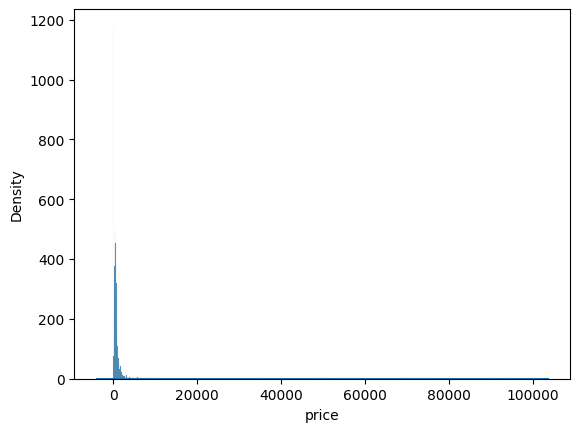

In [8]:
import statistics as s
import numpy as np
print(np.mean(car_df['price']))
print(np.median(car_df['price']))

print(s.mode(car_df['price']))

sns.distplot(car_df['price'])

#Finding the IQR
percentile25 =car_df['price'].quantile(0.25)
percentile75 = car_df['price'].quantile(0.75)
iqr=percentile75 - percentile25
print(iqr)
print(percentile25)
print(percentile75)

#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(upper_limit)
print(lower_limit)


#finding outliers
car_df[car_df['price'] > upper_limit]
car_df[car_df['price'] < lower_limit]

sns.histplot(car_df['price'])

In [9]:
car_df.columns

Index(['City', 'it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner',
       'oem', 'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Kms Driven',
       'RTO', 'Ownership', 'Engine Displacement', 'Transmission',
       'Year of Manufacture', 'feature_1', 'feature_2', 'feature_3',
       'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8',
       'feature_9', 'Mileage', 'Engine', 'Max Power', 'Torque', 'Wheel Size'],
      dtype='object')

In [10]:
Numerical_columns = ['km','ownerNo','owner','modelYear','centralVariantId','price','priceActual','priceSaving','Registration Year','Kms Driven','Engine Displacement','Year of Manufacture','Mileage','Engine','Max Power','Torque','Wheel Size']
categorical_columns = [ 'ft', 'bt', 'km', 'transmission', 'owner', 'oem', 'model',
                     'variantName', 'Registration Year',
                        'Insurance Validity', 'Fuel Type', 'Ownership', 'Transmission',
                        'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
                        'feature_6', 'feature_7', 'feature_8', 'feature_9']

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


Feature: km
Mean: 58974.302425618356
Median: 53692.0
Mode: 120000
IQR: 50000.0
25th Percentile: 30000.0
75th Percentile: 80000.0
Upper Limit: 155000.0
Lower Limit: -45000.0
Outliers above upper limit: 48
Outliers below lower limit: 0
Shape after trimming: (8321, 41)


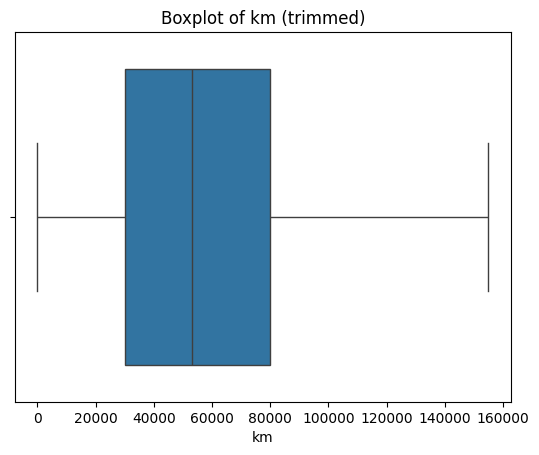


Feature: ownerNo
Mean: 1.360138606763054
Median: 1.0
Mode: 1
IQR: 1.0
25th Percentile: 1.0
75th Percentile: 2.0
Upper Limit: 3.5
Lower Limit: -0.5
Outliers above upper limit: 99
Outliers below lower limit: 0
Shape after trimming: (8270, 41)


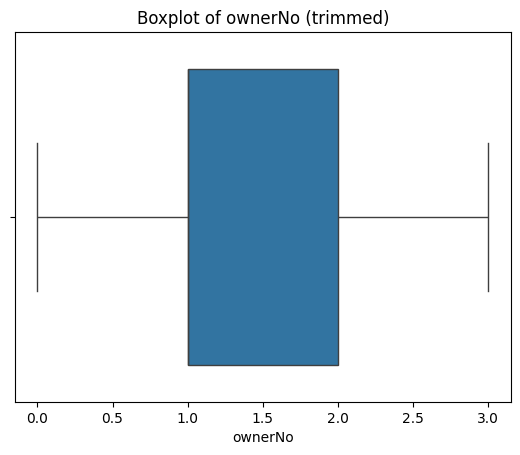


Feature: modelYear
Mean: 2016.5032859361932
Median: 2017.0
Mode: 2018
IQR: 5.0
25th Percentile: 2014.0
75th Percentile: 2019.0
Upper Limit: 2026.5
Lower Limit: 2006.5
Outliers above upper limit: 0
Outliers below lower limit: 132
Shape after trimming: (8237, 41)


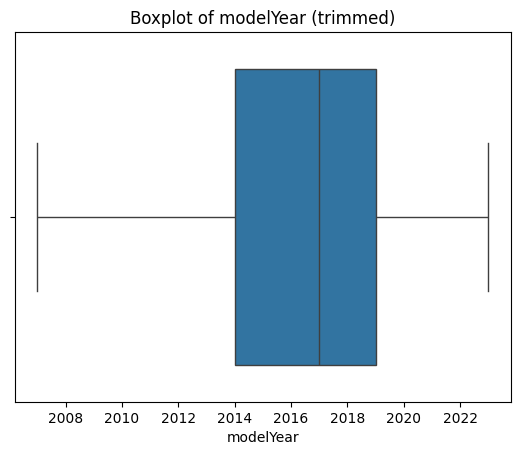


Feature: centralVariantId
Mean: 4962.5373401840125
Median: 5320.0
Mode: 10403
IQR: 5079.0
25th Percentile: 2042.0
75th Percentile: 7121.0
Upper Limit: 14739.5
Lower Limit: -5576.5
Outliers above upper limit: 0
Outliers below lower limit: 0
Shape after trimming: (8369, 41)


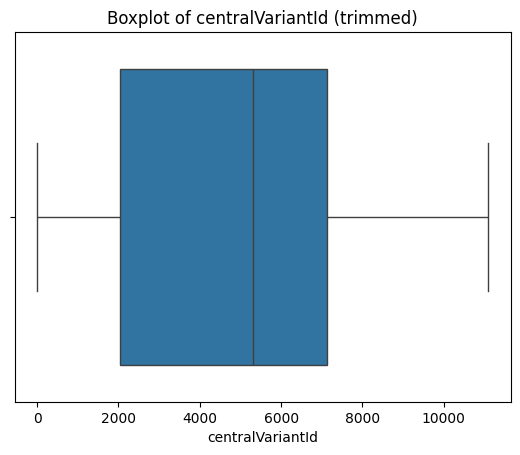


Feature: price
Mean: 1554.8263830804158
Median: 523.0
Mode: 650
IQR: 540.0
25th Percentile: 277.0
75th Percentile: 817.0
Upper Limit: 1627.0
Lower Limit: -533.0
Outliers above upper limit: 748
Outliers below lower limit: 0
Shape after trimming: (7621, 41)


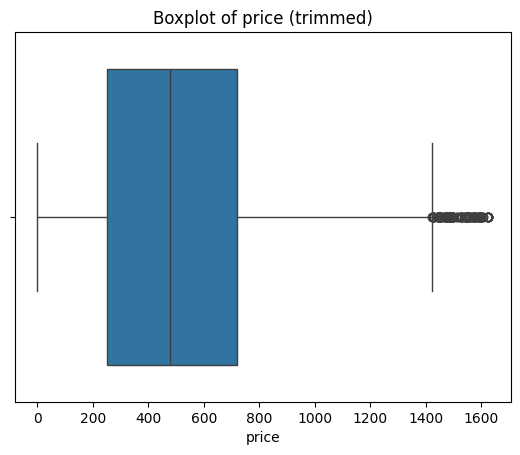


Feature: Registration Year
Mean: 637.8499223324172
Median: 19.0
Mode: 18
IQR: 1995.0
25th Percentile: 16.0
75th Percentile: 2011.0
Upper Limit: 5003.5
Lower Limit: -2976.5
Outliers above upper limit: 0
Outliers below lower limit: 0
Shape after trimming: (8369, 41)


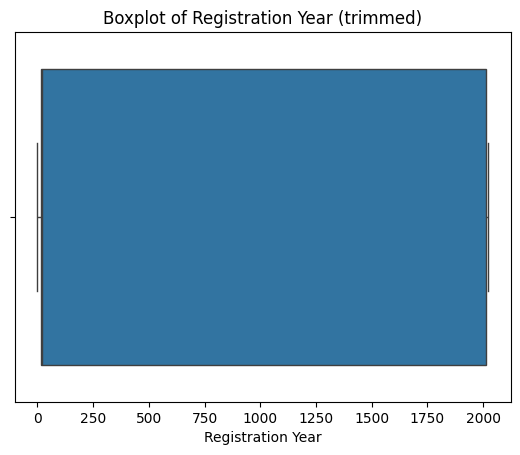


Feature: Kms Driven
Mean: 58974.302425618356
Median: 53692.0
Mode: 120000
IQR: 50000.0
25th Percentile: 30000.0
75th Percentile: 80000.0
Upper Limit: 155000.0
Lower Limit: -45000.0
Outliers above upper limit: 48
Outliers below lower limit: 0
Shape after trimming: (8321, 41)


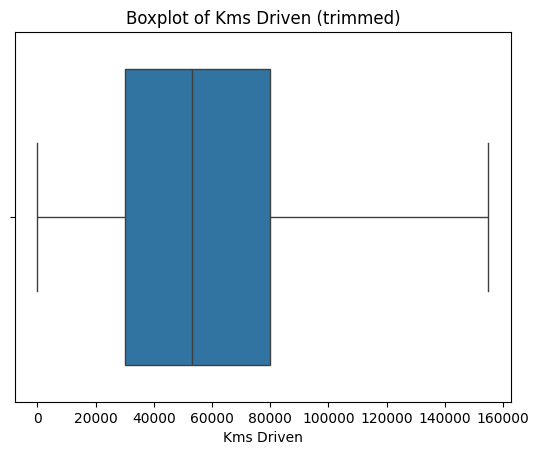


Feature: Engine Displacement
Mean: 1424.0549647508662
Median: 1248.0
Mode: 1197
IQR: 301.0
25th Percentile: 1197.0
75th Percentile: 1498.0
Upper Limit: 1949.5
Lower Limit: 745.5
Outliers above upper limit: 1489
Outliers below lower limit: 42
Shape after trimming: (6838, 41)


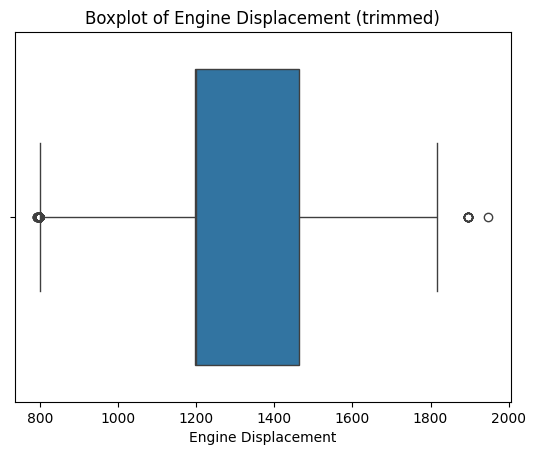


Feature: Year of Manufacture
Mean: 2011.7287609033338
Median: 2017.0
Mode: 2018
IQR: 5.0
25th Percentile: 2014.0
75th Percentile: 2019.0
Upper Limit: 2026.5
Lower Limit: 2006.5
Outliers above upper limit: 0
Outliers below lower limit: 132
Shape after trimming: (8237, 41)


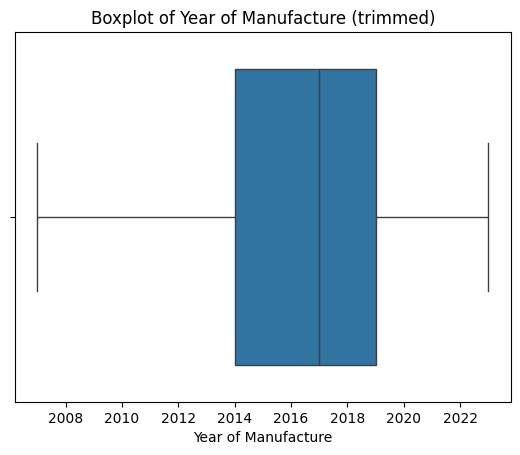


Feature: Mileage
Mean: 18.59550782650257
Median: 18.9
Mode: 18.9
IQR: 4.599999999999998
25th Percentile: 16.8
75th Percentile: 21.4
Upper Limit: 28.299999999999997
Lower Limit: 9.900000000000004
Outliers above upper limit: 87
Outliers below lower limit: 323
Shape after trimming: (7959, 41)


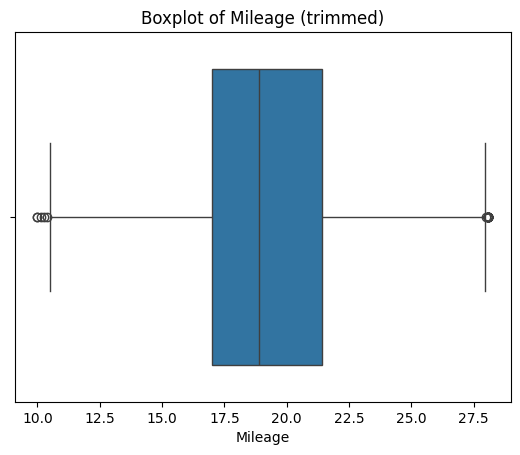


Feature: Engine
Mean: 1424.0549647508662
Median: 1248.0
Mode: 1197
IQR: 301.0
25th Percentile: 1197.0
75th Percentile: 1498.0
Upper Limit: 1949.5
Lower Limit: 745.5
Outliers above upper limit: 1489
Outliers below lower limit: 42
Shape after trimming: (6838, 41)


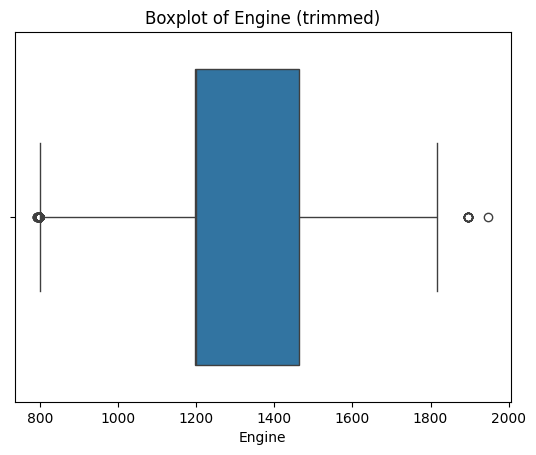


Feature: Max Power
Mean: 759212.2053766402
Median: 88.7
Mode: 88.5
IQR: 41.78999999999999
25th Percentile: 78.9
75th Percentile: 120.69
Upper Limit: 183.375
Lower Limit: 16.215000000000018
Outliers above upper limit: 668
Outliers below lower limit: 60
Shape after trimming: (7641, 41)


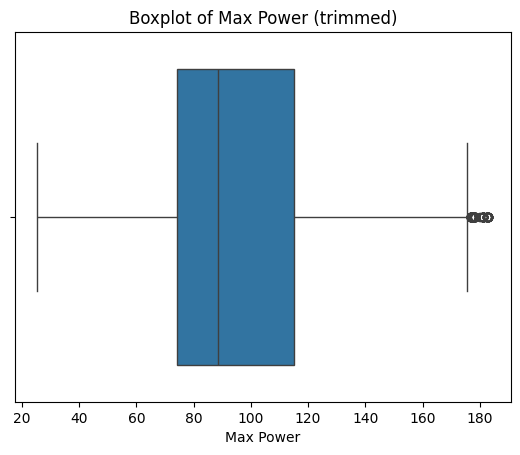


Feature: Torque
Mean: 20098943.355070803
Median: 140.0
Mode: 113.0
IQR: 109.69999999999999
25th Percentile: 110.0
75th Percentile: 219.7
Upper Limit: 384.25
Lower Limit: -54.54999999999998
Outliers above upper limit: 590
Outliers below lower limit: 0
Shape after trimming: (7779, 41)


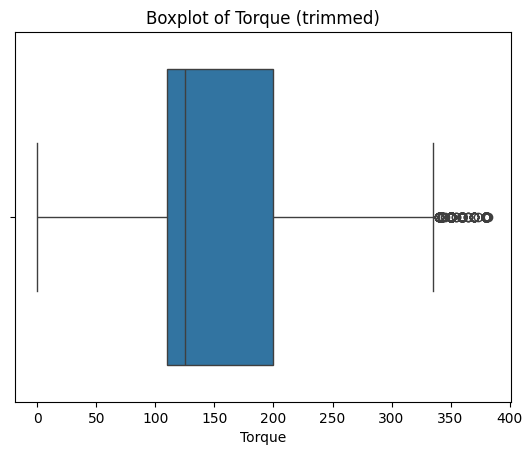

In [12]:


# Assuming car_df is your DataFrame containing the data
Numerical_columns = ['km', 'ownerNo',  'modelYear', 'centralVariantId', 'price', 
                     'Registration Year', 'Kms Driven', 'Engine Displacement', 'Year of Manufacture', 'Mileage', 
                     'Engine', 'Max Power', 'Torque']

# Loop through each continuous feature
for data in Numerical_columns:
    print(f"\nFeature: {data}")
    
    # Check if the column exists in the DataFrame
    if data not in car_df.columns:
        print(f"{data} not found in DataFrame!")
        continue

    # Attempt to convert the column to numeric, ignoring non-convertible strings
    car_df[data] = pd.to_numeric(car_df[data], errors='coerce')

    # Drop rows with NaN values created by failed conversions
    numeric_data = car_df[data].dropna()

    if numeric_data.empty:
        print(f"{data} contains no numeric data.")
        continue

    # Calculate the mean, median, and mode
    mean_value = np.mean(numeric_data)
    median_value = np.median(numeric_data)
    mode_value = numeric_data.mode()[0]  # Assuming first mode if multiple

    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value}")

    # Plot distribution
    #sns.histplot(numeric_data, kde=True)
    #plt.title(f"Distribution of {data}")
    #plt.show()

    # Calculate the IQR
    percentile25 = numeric_data.quantile(0.25)
    percentile75 = numeric_data.quantile(0.75)
    iqr = percentile75 - percentile25
    print(f"IQR: {iqr}")
    print(f"25th Percentile: {percentile25}")
    print(f"75th Percentile: {percentile75}")

    # Calculate upper and lower limits
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print(f"Upper Limit: {upper_limit}")
    print(f"Lower Limit: {lower_limit}")

    # Find outliers
    outliers_above = car_df[car_df[data] > upper_limit]
    outliers_below = car_df[car_df[data] < lower_limit]
    print(f"Outliers above upper limit: {outliers_above.shape[0]}")
    print(f"Outliers below lower limit: {outliers_below.shape[0]}")

    # Option to trim outliers (optional)
    trimmed_df = car_df[(car_df[data] >= lower_limit) & (car_df[data] <= upper_limit)]
    print(f"Shape after trimming: {trimmed_df.shape}")

    # Create a boxplot
    sns.boxplot(x=trimmed_df[data])
    plt.title(f"Boxplot of {data} (trimmed)")
    plt.show()


In [13]:
car_df

,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,feature_5,feature_6,feature_7,feature_8,feature_9,Mileage,Engine,Max Power,Torque,Wheel Size
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Unknown,23.10,998,67.04,90.00,Unknown
1,Bangalore,0,Petrol,SUV,32706,Manual,2,2nd Owner,Ford,Ford Ecosport,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,17.00,1497,121.31,150.00,16
2,Bangalore,0,Petrol,Hatchback,11949,Manual,1,1st Owner,Tata,Tata Tiago,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,23.84,1199,84.00,114.00,14
3,Bangalore,0,Petrol,Sedan,17794,Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,19.10,1197,81.86,113.75,14
4,Bangalore,0,Diesel,SUV,60000,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Radio,23.65,1248,88.50,200.00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,10000,Manual,1,1st Owner,Maruti,Maruti Celerio,...,Adjustable Head Lights,Power Adjustable Exterior Rear View Mirror,Anti Lock Braking System,Centeral Locking,Radio,25.24,998,65.71,89.00,Unknown
8365,Kolkata,0,Petrol,Hatchback,120000,Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Unknown,22.74,796,47.30,69.00,Unknown
8366,Kolkata,0,Petrol,Sedan,50000,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Brake Assist,Cd Player,11.74,1796,186.00,285.00,17
8367,Kolkata,0,Petrol,Hatchback,40000,Manual,1,1st Owner,Maruti,Maruti Ritz,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,18.50,1197,85.80,114.00,14


Column: ft
Frequency IQR: 2645.0
25th Percentile (frequency): 28.0
75th Percentile (frequency): 2673.0
Upper Limit (frequency): 6640.5
Lower Limit (frequency): -3939.5
Outliers Above (high frequency categories): Series([], Name: count, dtype: int64)
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


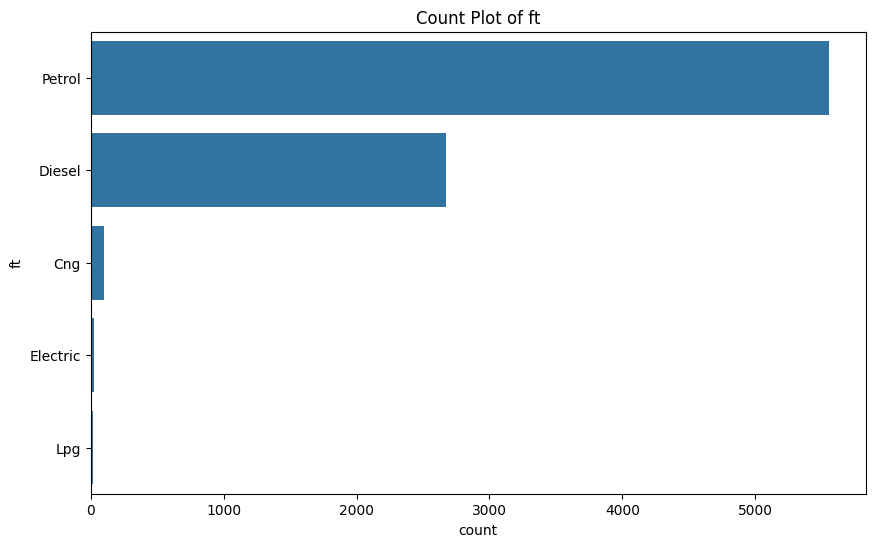

Column: bt
Frequency IQR: 1258.0
25th Percentile (frequency): 5.0
75th Percentile (frequency): 1263.0
Upper Limit (frequency): 3150.0
Lower Limit (frequency): -1882.0
Outliers Above (high frequency categories): bt
Hatchback    3567
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


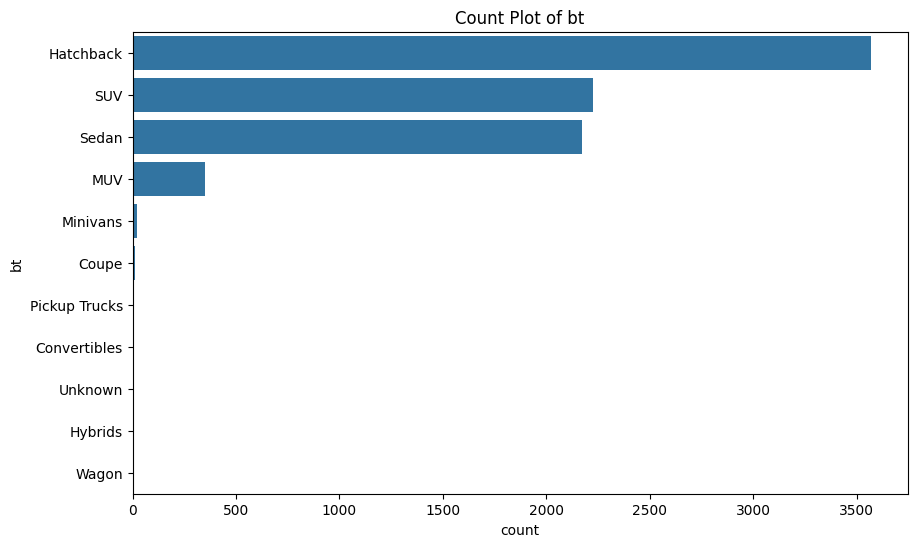

Column: km
Frequency IQR: 0.0
25th Percentile (frequency): 1.0
75th Percentile (frequency): 1.0
Upper Limit (frequency): 1.0
Lower Limit (frequency): 1.0
Outliers Above (high frequency categories): km
120000    315
50000     263
70000     262
60000     259
30000     253
         ... 
10700       2
4900        2
39886       2
10371       2
99225       2
Name: count, Length: 260, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


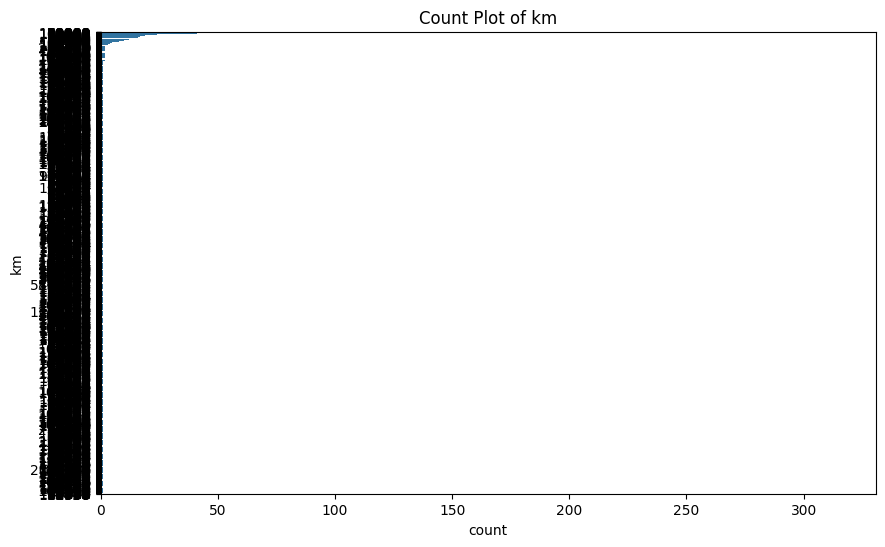

Column: transmission
Frequency IQR: 1867.5
25th Percentile (frequency): 3250.75
75th Percentile (frequency): 5118.25
Upper Limit (frequency): 7919.5
Lower Limit (frequency): 449.5
Outliers Above (high frequency categories): Series([], Name: count, dtype: int64)
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


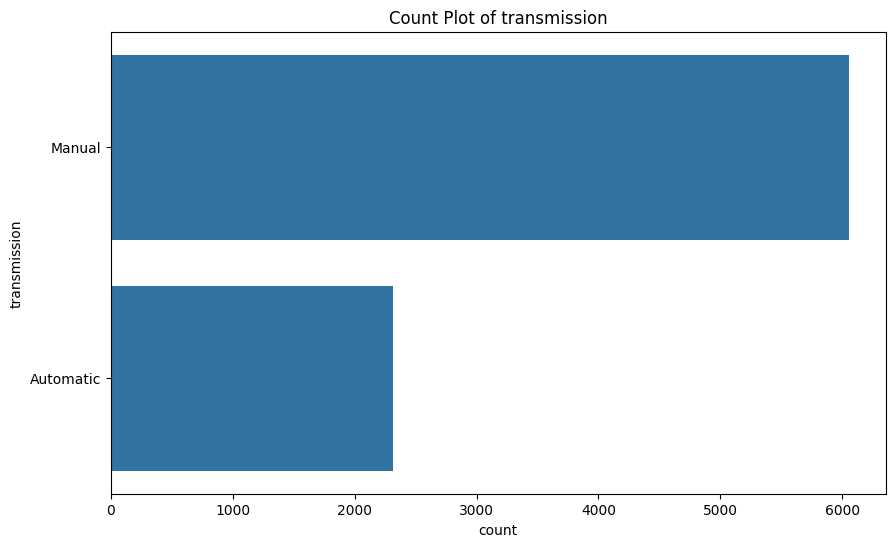

Column: owner
Frequency IQR: 1536.0
25th Percentile (frequency): 44.0
75th Percentile (frequency): 1580.0
Upper Limit (frequency): 3884.0
Lower Limit (frequency): -2260.0
Outliers Above (high frequency categories): owner
1st Owner    5882
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


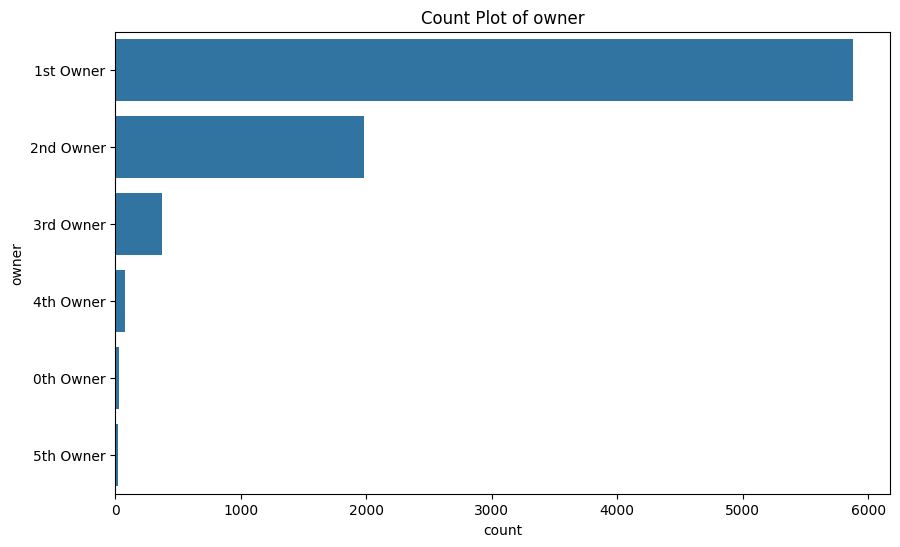

Column: oem
Frequency IQR: 282.0
25th Percentile (frequency): 12.0
75th Percentile (frequency): 294.0
Upper Limit (frequency): 717.0
Lower Limit (frequency): -411.0
Outliers Above (high frequency categories): oem
Maruti     2252
Hyundai    1651
Honda       865
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


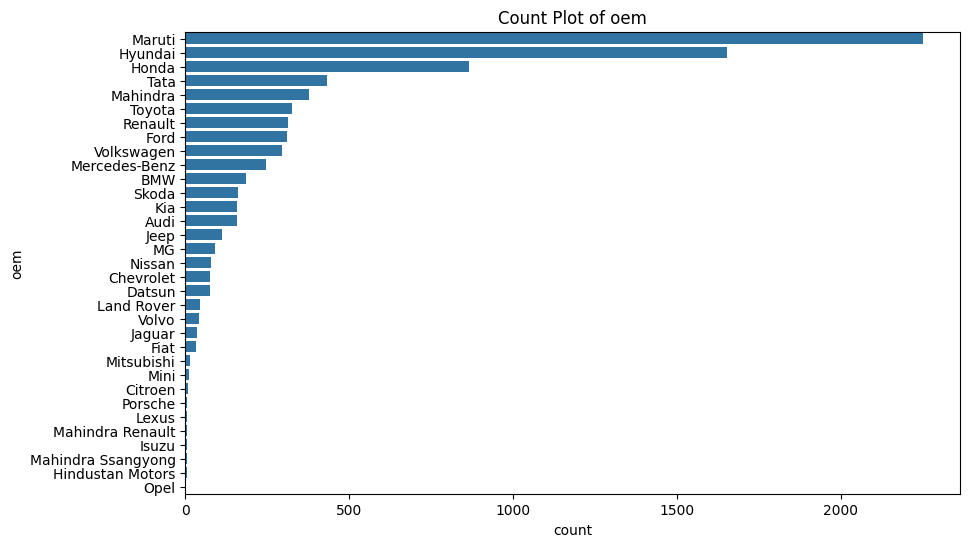

Column: model
Frequency IQR: 20.0
25th Percentile (frequency): 2.0
75th Percentile (frequency): 22.0
Upper Limit (frequency): 52.0
Lower Limit (frequency): -28.0
Outliers Above (high frequency categories): model
Honda City                370
Maruti Swift              350
Hyundai i20               331
Maruti Baleno             295
Hyundai Grand i10         260
Maruti Swift Dzire        253
Maruti Wagon R            250
Hyundai Creta             194
Hyundai i10               183
Hyundai Verna             182
Honda Amaze               175
Ford Ecosport             167
Maruti Alto 800           163
Maruti Celerio            152
Renault KWID              150
Volkswagen Polo           147
Mahindra XUV500           129
Maruti Ciaz               128
Honda Jazz                112
Jeep Compass              103
Tata Tiago                 96
Kia Seltos                 95
Maruti Vitara Brezza       93
Tata Nexon                 88
Maruti Alto K10            84
Maruti Ertiga              82
Honda WR

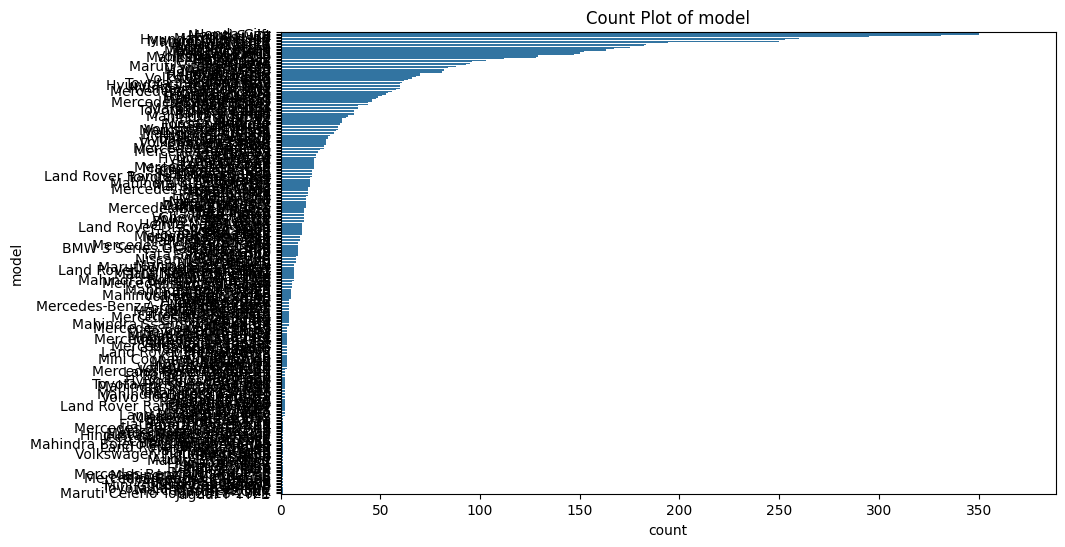

Column: variantName
Frequency IQR: 3.0
25th Percentile (frequency): 1.0
75th Percentile (frequency): 4.0
Upper Limit (frequency): 8.5
Lower Limit (frequency): -3.5
Outliers Above (high frequency categories): variantName
VXI                                 337
LXI                                 145
Sportz                               97
VDI                                  78
Magna                                77
                                   ... 
VDi Option                            9
Sportz 1.1L                           9
EX                                    9
LX 4-Str Hard Top Diesel AT BSVI      9
1.2 Asta Option                       9
Name: count, Length: 182, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


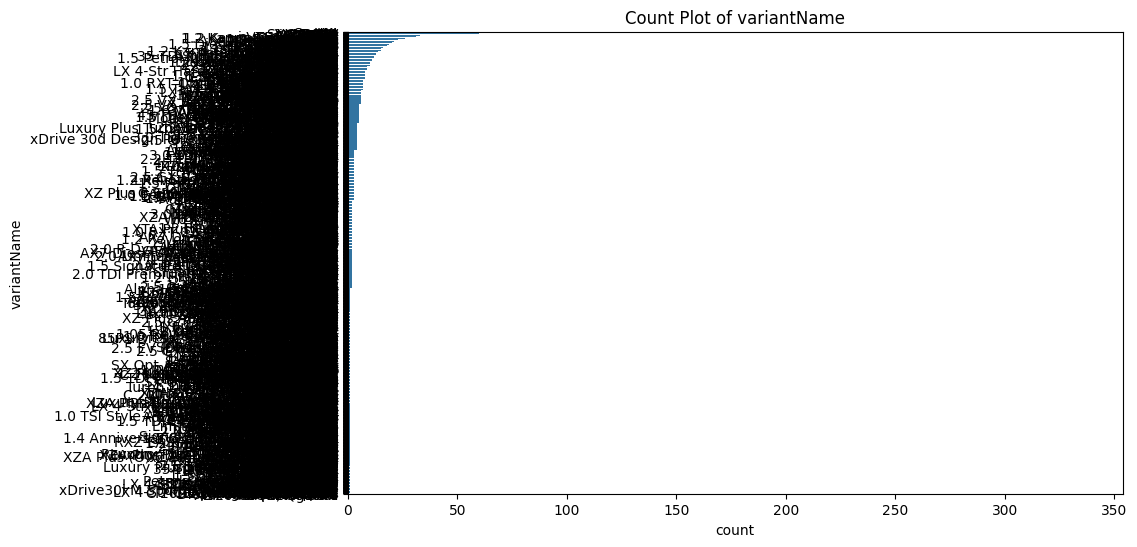

Column: Registration Year
Frequency IQR: 169.0
25th Percentile (frequency): 32.0
75th Percentile (frequency): 201.0
Upper Limit (frequency): 454.5
Lower Limit (frequency): -221.5
Outliers Above (high frequency categories): Registration Year
18    778
17    743
19    622
16    614
21    502
20    473
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


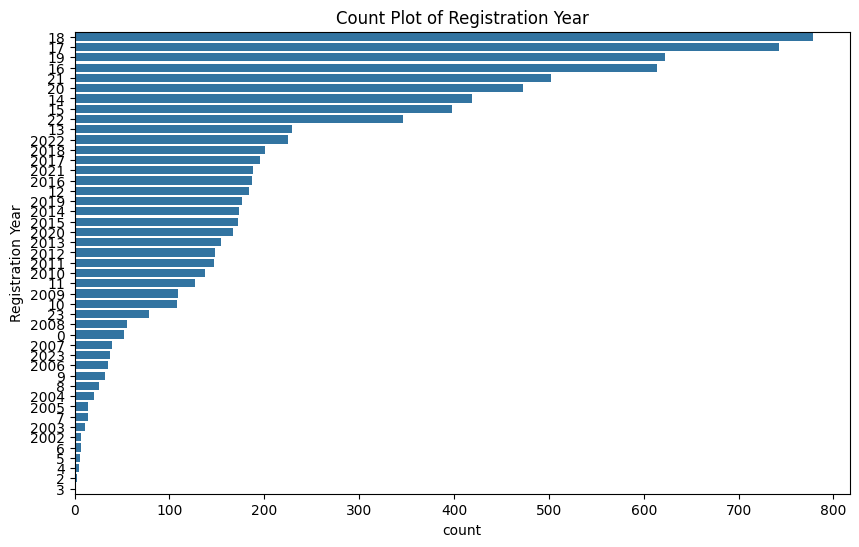

Column: Insurance Validity
Frequency IQR: 1256.25
25th Percentile (frequency): 3.75
75th Percentile (frequency): 1260.0
Upper Limit (frequency): 3144.375
Lower Limit (frequency): -1880.625
Outliers Above (high frequency categories): Insurance Validity
Third Party insurance    4055
Comprehensive            3150
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


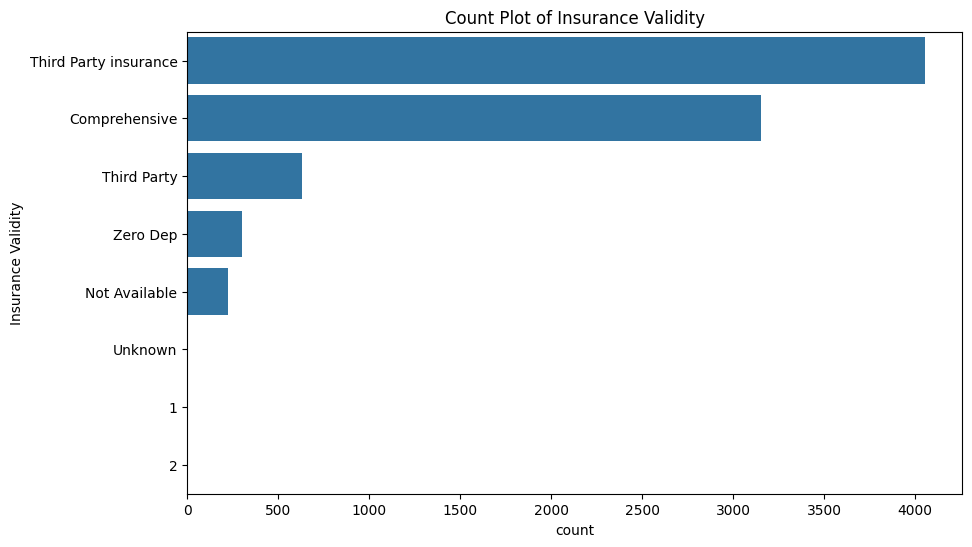

Column: Fuel Type
Frequency IQR: 2645.0
25th Percentile (frequency): 28.0
75th Percentile (frequency): 2673.0
Upper Limit (frequency): 6640.5
Lower Limit (frequency): -3939.5
Outliers Above (high frequency categories): Series([], Name: count, dtype: int64)
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


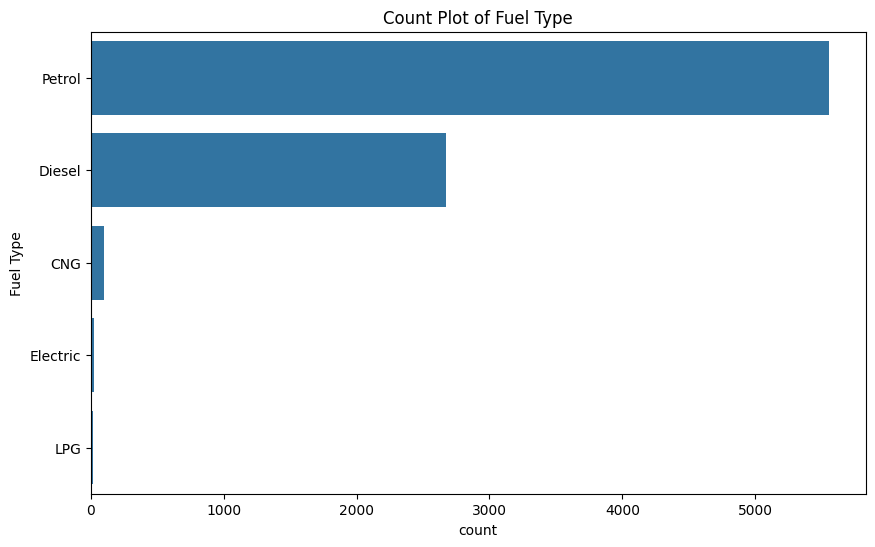

Column: Ownership
Frequency IQR: 1536.0
25th Percentile (frequency): 44.0
75th Percentile (frequency): 1580.0
Upper Limit (frequency): 3884.0
Lower Limit (frequency): -2260.0
Outliers Above (high frequency categories): Ownership
First Owner    5882
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


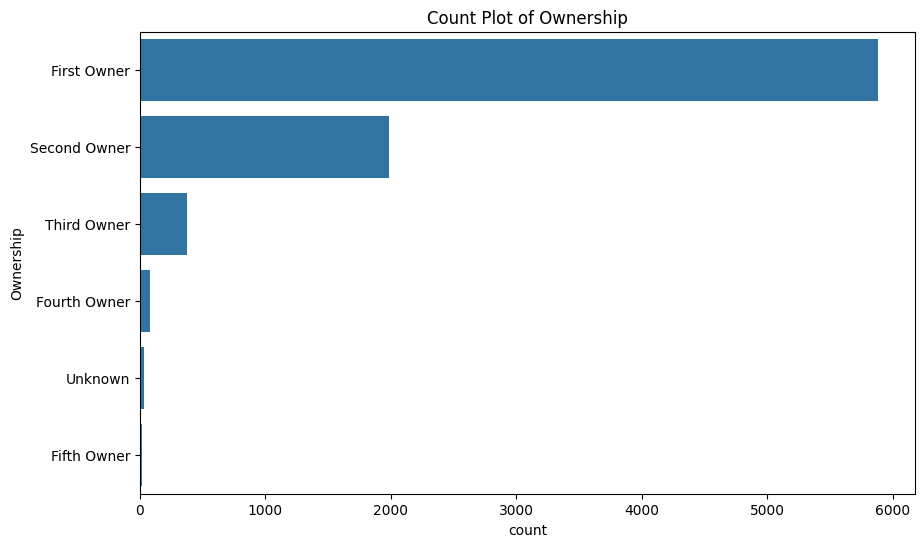

Column: Transmission
Frequency IQR: 1867.5
25th Percentile (frequency): 3250.75
75th Percentile (frequency): 5118.25
Upper Limit (frequency): 7919.5
Lower Limit (frequency): 449.5
Outliers Above (high frequency categories): Series([], Name: count, dtype: int64)
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


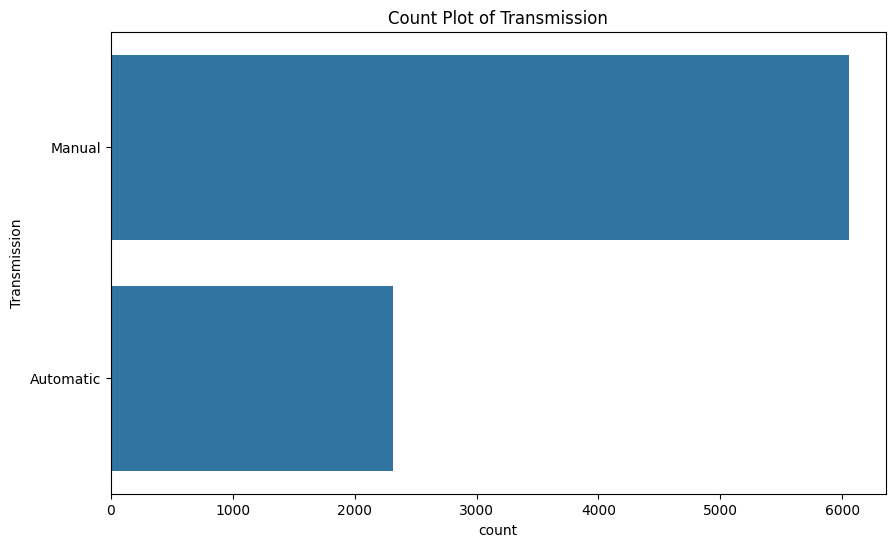

Column: feature_1
Frequency IQR: 21.0
25th Percentile (frequency): 2.0
75th Percentile (frequency): 23.0
Upper Limit (frequency): 54.5
Lower Limit (frequency): -29.5
Outliers Above (high frequency categories): feature_1
Power Steering    8189
Unknown             65
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


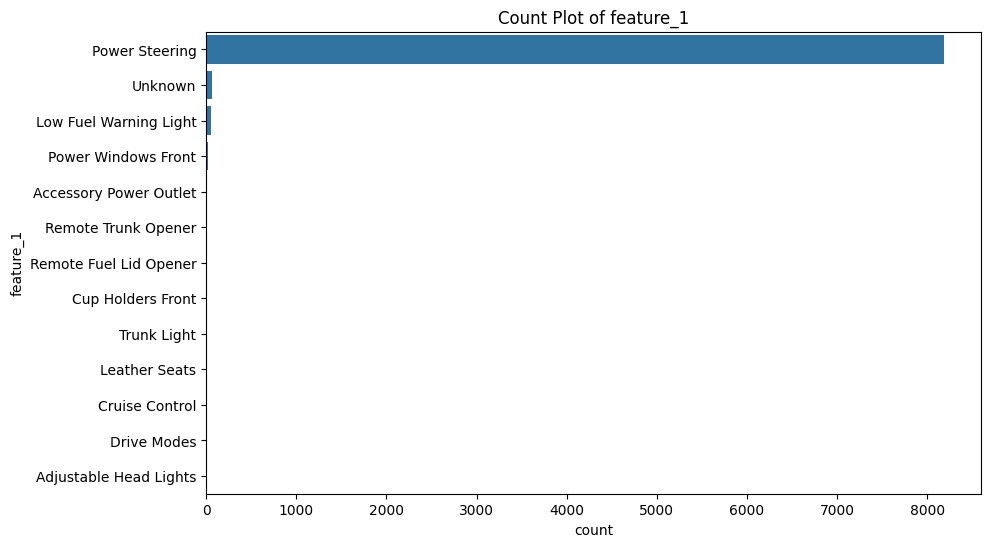

Column: feature_2
Frequency IQR: 24.0
25th Percentile (frequency): 1.0
75th Percentile (frequency): 25.0
Upper Limit (frequency): 61.0
Lower Limit (frequency): -35.0
Outliers Above (high frequency categories): feature_2
Power Windows Front       7919
Remote Trunk Opener        152
Low Fuel Warning Light      86
Unknown                     65
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


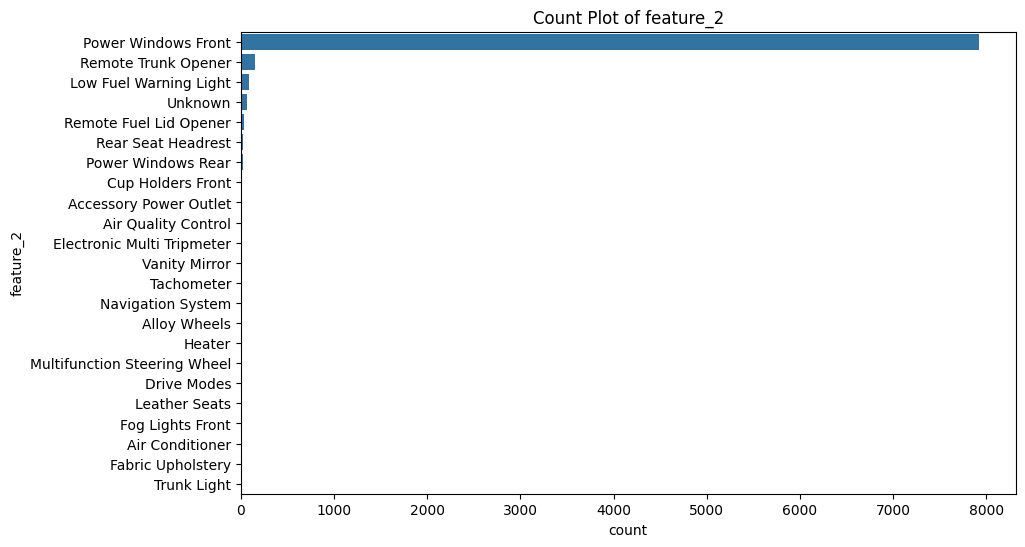

Column: feature_3
Frequency IQR: 7.5
25th Percentile (frequency): 2.0
75th Percentile (frequency): 9.5
Upper Limit (frequency): 20.75
Lower Limit (frequency): -9.25
Outliers Above (high frequency categories): feature_3
Air Conditioner    8222
Unknown              75
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


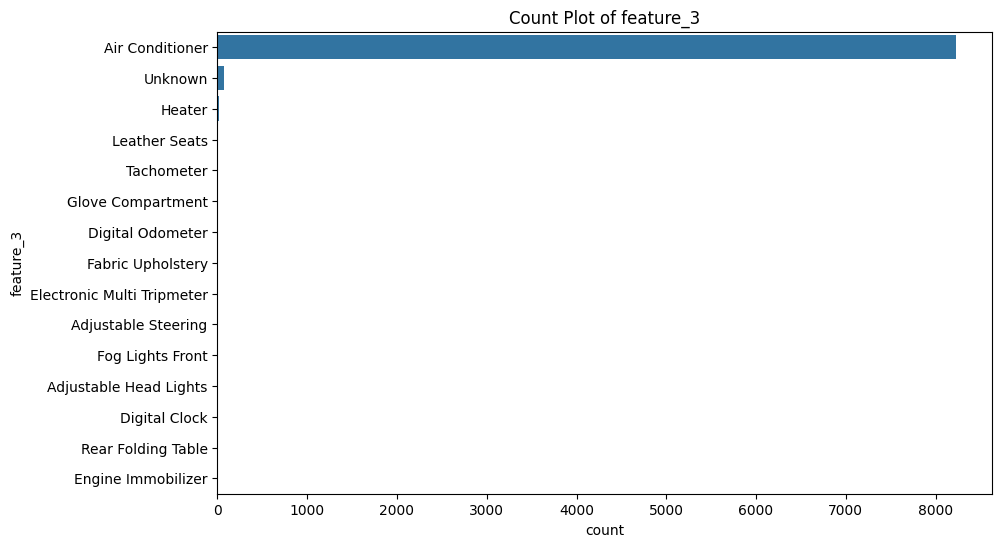

Column: feature_4
Frequency IQR: 13.0
25th Percentile (frequency): 3.0
75th Percentile (frequency): 16.0
Upper Limit (frequency): 35.5
Lower Limit (frequency): -16.5
Outliers Above (high frequency categories): feature_4
Heater     8165
Unknown      76
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


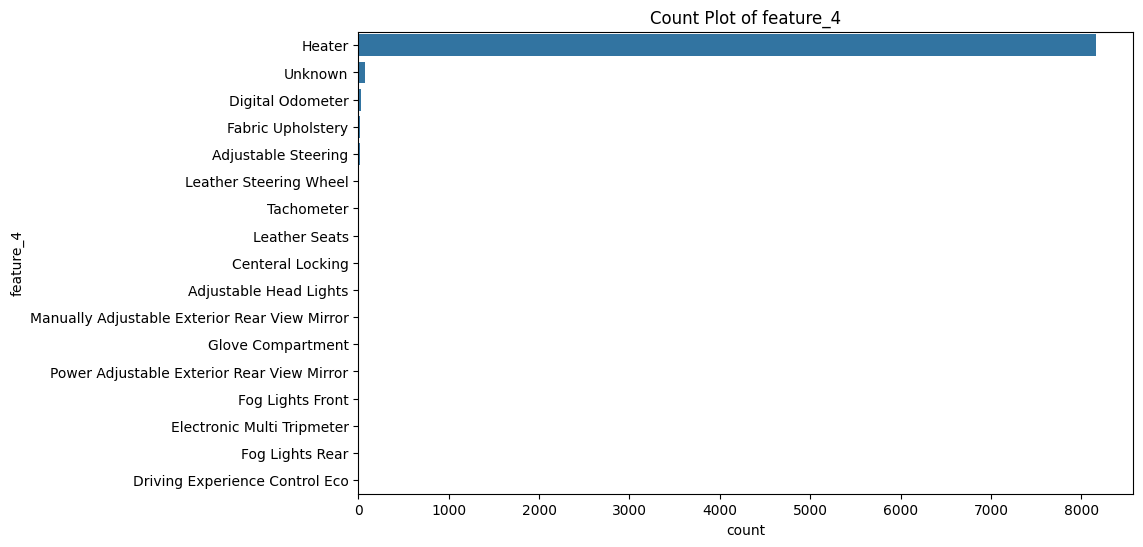

Column: feature_5
Frequency IQR: 94.0
25th Percentile (frequency): 5.75
75th Percentile (frequency): 99.75
Upper Limit (frequency): 240.75
Lower Limit (frequency): -135.25
Outliers Above (high frequency categories): feature_5
Adjustable Head Lights    7792
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


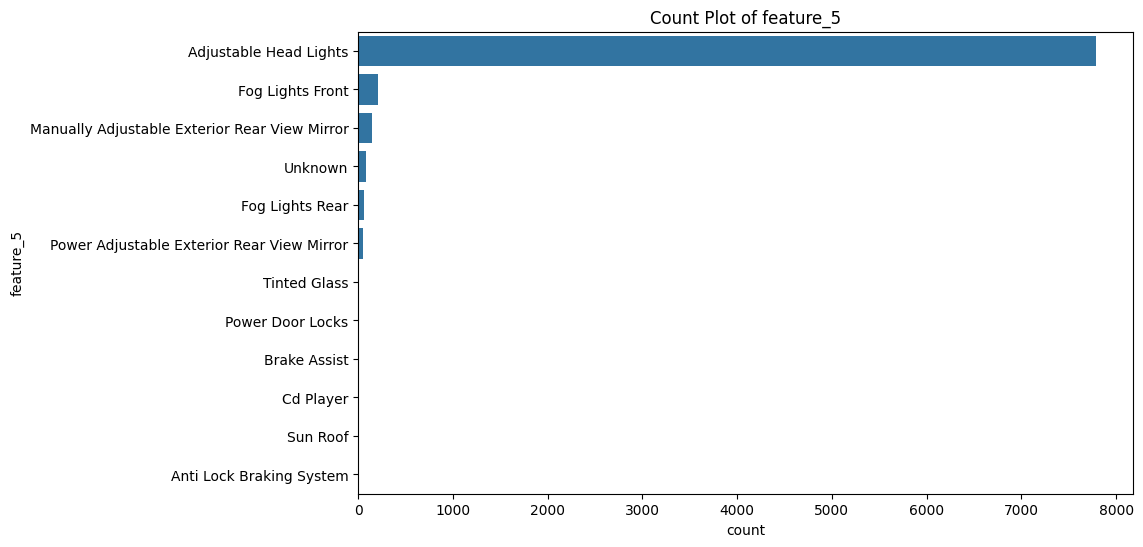

Column: feature_6
Frequency IQR: 53.75
25th Percentile (frequency): 2.0
75th Percentile (frequency): 55.75
Upper Limit (frequency): 136.375
Lower Limit (frequency): -78.625
Outliers Above (high frequency categories): feature_6
Fog Lights Front                                 5009
Power Adjustable Exterior Rear View Mirror       1687
Manually Adjustable Exterior Rear View Mirror    1155
Fog Lights Rear                                   206
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


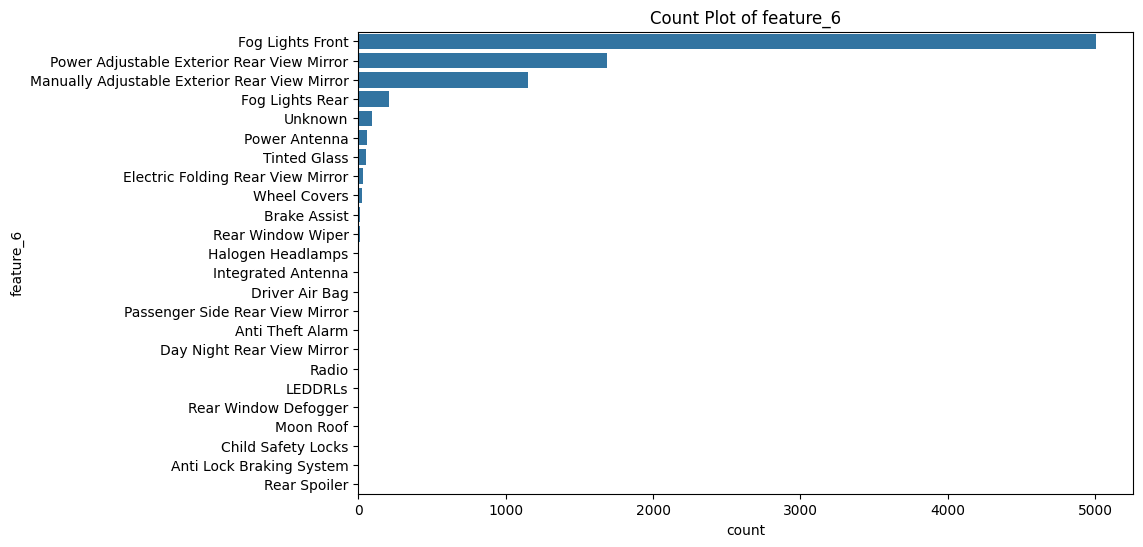

Column: feature_7
Frequency IQR: 80.5
25th Percentile (frequency): 3.5
75th Percentile (frequency): 84.0
Upper Limit (frequency): 204.75
Lower Limit (frequency): -117.25
Outliers Above (high frequency categories): feature_7
Anti Lock Braking System    6842
Centeral Locking            1085
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


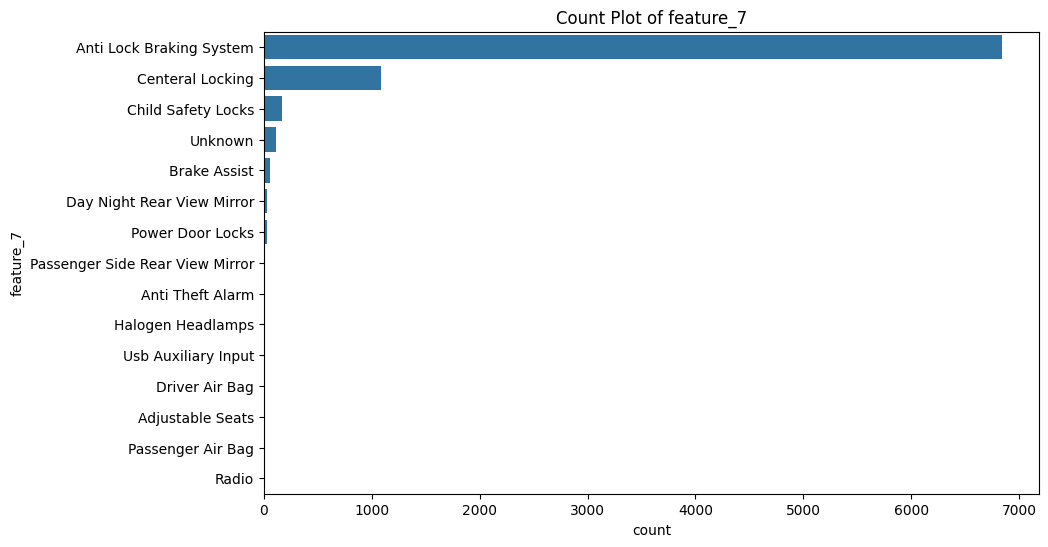

Column: feature_8
Frequency IQR: 193.0
25th Percentile (frequency): 2.0
75th Percentile (frequency): 195.0
Upper Limit (frequency): 484.5
Lower Limit (frequency): -287.5
Outliers Above (high frequency categories): feature_8
Centeral Locking    4287
Brake Assist        2407
Power Door Locks     650
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


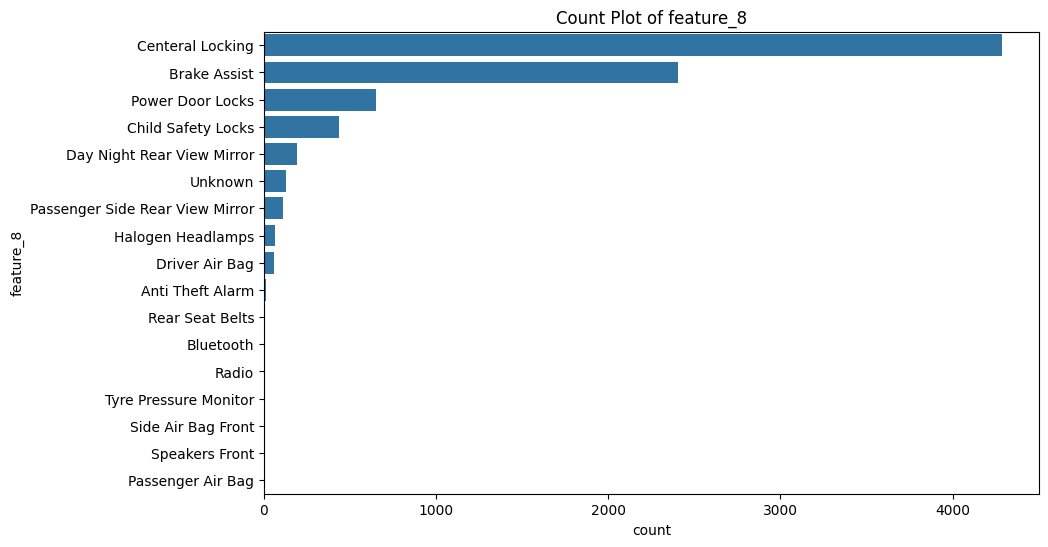

Column: feature_9
Frequency IQR: 84.25
25th Percentile (frequency): 6.25
75th Percentile (frequency): 90.5
Upper Limit (frequency): 216.875
Lower Limit (frequency): -120.125
Outliers Above (high frequency categories): feature_9
Cd Player    3808
Radio        3199
Unknown      1102
Name: count, dtype: int64
Outliers Below (low frequency categories): Series([], Name: count, dtype: int64)
----------------------------------------


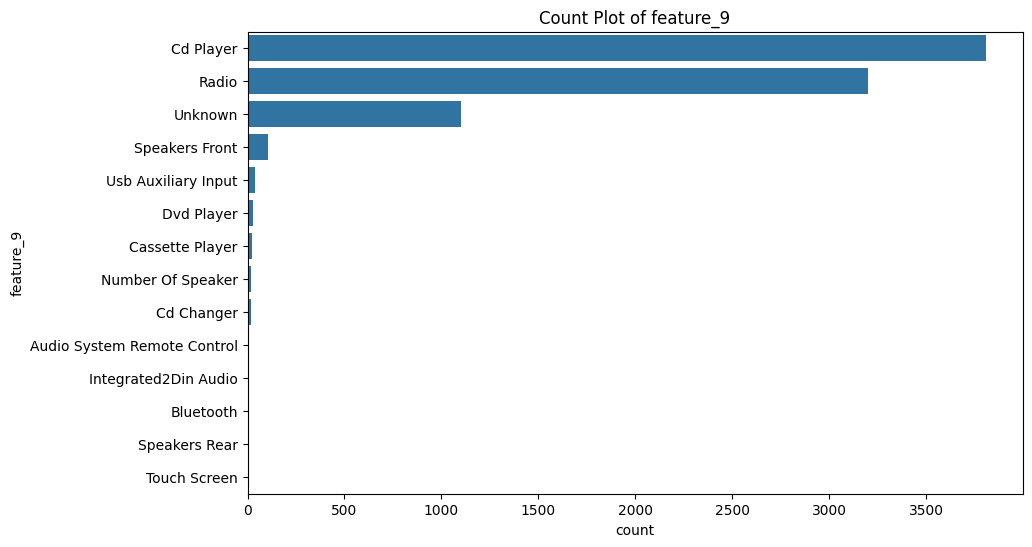

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = [ 'ft', 'bt', 'km', 'transmission', 'owner', 'oem', 'model',
                        'variantName', 'Registration Year', 'Insurance Validity', 
                        'Fuel Type', 'Ownership', 'Transmission', 'feature_1', 
                        'feature_2', 'feature_3', 'feature_4', 'feature_5', 
                        'feature_6', 'feature_7', 'feature_8', 'feature_9']

# Function to calculate IQR-like metrics for categorical columns based on frequency
def calculate_iqr_categorical(car_df, column):
    # Get the frequency counts of each category
    category_counts = car_df[column].value_counts()
    
    # Calculate Q1, Q3, and IQR on frequency counts
    percentile25 = category_counts.quantile(0.25)
    percentile75 = category_counts.quantile(0.75)
    iqr = percentile75 - percentile25
    
    # Calculate upper and lower limits for outlier detection
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    # Finding outliers based on frequency
    outliers_upper = category_counts[category_counts > upper_limit]
    outliers_lower = category_counts[category_counts < lower_limit]
    
    print(f"Column: {column}")
    print(f"Frequency IQR: {iqr}")
    print(f"25th Percentile (frequency): {percentile25}")
    print(f"75th Percentile (frequency): {percentile75}")
    print(f"Upper Limit (frequency): {upper_limit}")
    print(f"Lower Limit (frequency): {lower_limit}")
    print(f"Outliers Above (high frequency categories): {outliers_upper}")
    print(f"Outliers Below (low frequency categories): {outliers_lower}")
    print('-'*40)

    return iqr, upper_limit, lower_limit

# Loop over all categorical columns and calculate IQR for each based on frequency
for column in categorical_columns:
    if column in car_df.columns:
        calculate_iqr_categorical(car_df, column)
        
        # Plotting the frequency distribution as a countplot
        plt.figure(figsize=(10, 6))
        sns.countplot(y=car_df[column], order=car_df[column].value_counts().index)
        plt.title(f"Count Plot of {column}")
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataframe.")


In [15]:
car_df

,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,feature_5,feature_6,feature_7,feature_8,feature_9,Mileage,Engine,Max Power,Torque,Wheel Size
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Unknown,23.10,998,67.04,90.00,Unknown
1,Bangalore,0,Petrol,SUV,32706,Manual,2,2nd Owner,Ford,Ford Ecosport,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,17.00,1497,121.31,150.00,16
2,Bangalore,0,Petrol,Hatchback,11949,Manual,1,1st Owner,Tata,Tata Tiago,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,23.84,1199,84.00,114.00,14
3,Bangalore,0,Petrol,Sedan,17794,Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,19.10,1197,81.86,113.75,14
4,Bangalore,0,Diesel,SUV,60000,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Radio,23.65,1248,88.50,200.00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,10000,Manual,1,1st Owner,Maruti,Maruti Celerio,...,Adjustable Head Lights,Power Adjustable Exterior Rear View Mirror,Anti Lock Braking System,Centeral Locking,Radio,25.24,998,65.71,89.00,Unknown
8365,Kolkata,0,Petrol,Hatchback,120000,Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Unknown,22.74,796,47.30,69.00,Unknown
8366,Kolkata,0,Petrol,Sedan,50000,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Brake Assist,Cd Player,11.74,1796,186.00,285.00,17
8367,Kolkata,0,Petrol,Hatchback,40000,Manual,1,1st Owner,Maruti,Maruti Ritz,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,18.50,1197,85.80,114.00,14


In [16]:
car_df.to_csv("final_car_df.csv", index = False)

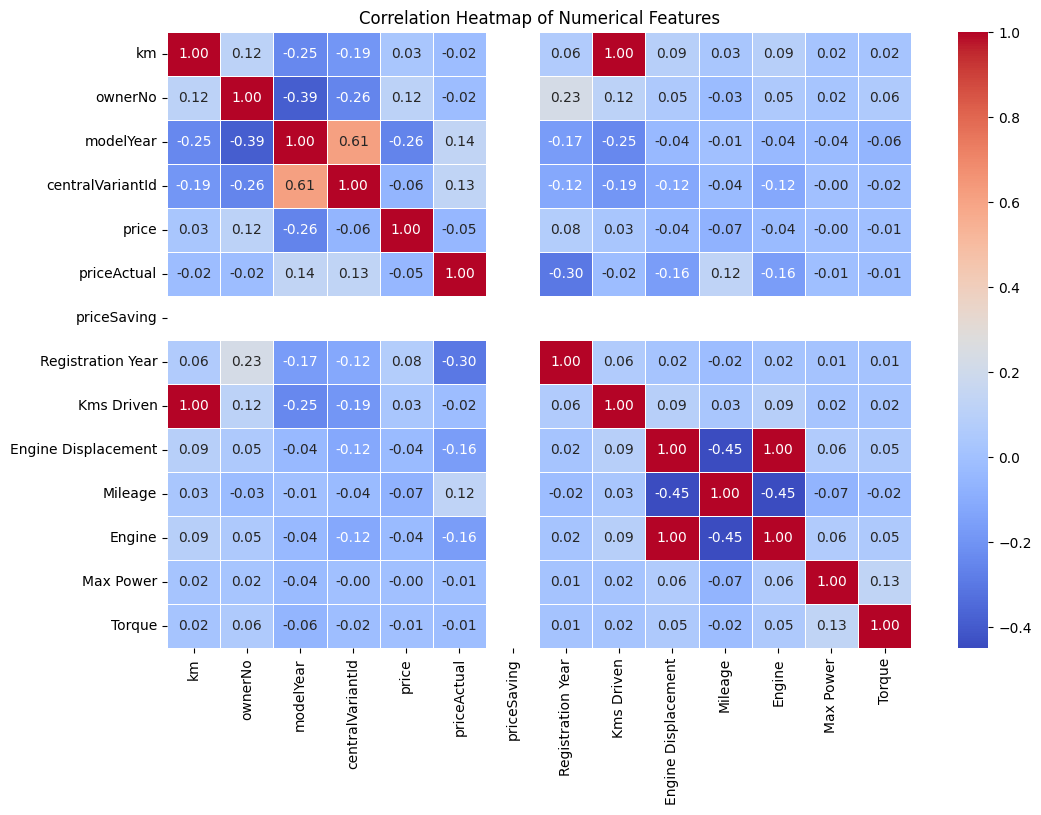

In [23]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = ['km', 'ownerNo',  'modelYear', 'centralVariantId', 'price', 
                     'priceActual', 'priceSaving', 'Registration Year', 'Kms Driven', 
                     'Engine Displacement',  'Mileage', 'Engine', 
                     'Max Power', 'Torque' ]


numerical_data = car_df[numerical_columns]

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 8))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


plt.title("Correlation Heatmap of Numerical Features")

plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming car_df is your DataFrame
categorical_columns = [
    'ft', 'bt', 'km', 'transmission', 'owner', 'oem', 'model',
    'variantName', 'Registration Year', 'Insurance Validity',
    'Fuel Type', 'Ownership', 'Transmission', 'feature_1', 
    'feature_2', 'feature_3', 'feature_4', 'feature_5',
    'feature_6', 'feature_7', 'feature_8', 'feature_9'
]


categorical_data = car_df[categorical_columns]

encoded_data = pd.get_dummies(categorical_data, drop_first=True)

correlation_matrix = encoded_data.corr()


plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Encoded Categorical Features")

plt.show()


In [ ]:
final_car_df = pd.read_csv("D:/MDTM27/capstone project/car dekho1/final_car_df.csv")
final_car_df

,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,feature_5,feature_6,feature_7,feature_8,feature_9,Mileage,Engine,Max Power,Torque,Wheel Size
0,Bangalore,0,Petrol,Hatchback,120000,Manual,3,3rd Owner,Maruti,Maruti Celerio,...,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Centeral Locking,Child Safety Locks,Unknown,23.10,998,67.04,90.00,Unknown
1,Bangalore,0,Petrol,SUV,32706,Manual,2,2nd Owner,Ford,Ford Ecosport,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,17.00,1497,121.31,150.00,16
2,Bangalore,0,Petrol,Hatchback,11949,Manual,1,1st Owner,Tata,Tata Tiago,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,23.84,1199,84.00,114.00,14
3,Bangalore,0,Petrol,Sedan,17794,Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,19.10,1197,81.86,113.75,14
4,Bangalore,0,Diesel,SUV,60000,Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Radio,23.65,1248,88.50,200.00,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,Petrol,Hatchback,10000,Manual,1,1st Owner,Maruti,Maruti Celerio,...,Adjustable Head Lights,Power Adjustable Exterior Rear View Mirror,Anti Lock Braking System,Centeral Locking,Radio,25.24,998,65.71,89.00,Unknown
8365,Kolkata,0,Petrol,Hatchback,120000,Manual,1,1st Owner,Maruti,Maruti Alto 800,...,Adjustable Head Lights,Manually Adjustable Exterior Rear View Mirror,Day Night Rear View Mirror,Passenger Side Rear View Mirror,Unknown,22.74,796,47.30,69.00,Unknown
8366,Kolkata,0,Petrol,Sedan,50000,Automatic,3,3rd Owner,Mercedes-Benz,Mercedes-Benz C-Class,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Brake Assist,Cd Player,11.74,1796,186.00,285.00,17
8367,Kolkata,0,Petrol,Hatchback,40000,Manual,1,1st Owner,Maruti,Maruti Ritz,...,Adjustable Head Lights,Fog Lights Front,Anti Lock Braking System,Centeral Locking,Cd Player,18.50,1197,85.80,114.00,14


In [ ]:
Numerical_columns =['City', 'it', 'km', 'ownerNo', 'modelYear', 'centralVariantId', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Registration Year', 'Kms Driven', 'RTO', 'Engine Displacement',
       'Year of Manufacture', 'Mileage', 'Engine', 'Max Power', 'Torque',
       'Wheel Size']
categorical_columns = ['ft', 'bt', 'transmission', 'owner', 'oem', 'model', 'variantName',
       'Insurance Validity', 'Fuel Type', 'Ownership', 'Transmission',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9']

In [ ]:
#categorical_columns


categorical_columns = ['ft', 'bt', 'transmission', 'owner', 'oem', 'model', 'variantName',
       'Insurance Validity', 'Fuel Type', 'Ownership', 'Transmission',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9']

# Assuming 'final_car_df' is your DataFrame
df_categorical = final_car_df[categorical_columns]
df_numerical = final_car_df.drop(columns=categorical_columns)

print("Categorical DataFrame:")
print(df_categorical.head())

print("\nNumerical DataFrame:")
print(df_numerical.head())


Categorical DataFrame:
   ft  bt  transmission  owner  oem  model  variantName  Insurance Validity  \
0   4   2             1      3   20    160         1806                   5   
1   4   7             1      2    6     50          288                   2   
2   4   2             1      1   29    273          129                   2   
3   4   8             1      1    9     87          101                   2   
4   1   7             1      1   20    178          987                   5   

   Fuel Type  Ownership  Transmission  feature_1  feature_2  feature_3  \
0          4          4             1          7         14          2   
1          4          3             1          7         14          2   
2          4          1             1          7         14          2   
3          4          1             1          7         14          2   
4          1          1             1          7         14          2   

   feature_4  feature_5  feature_6  feature_7  feature_8 

In [ ]:
df_categorical = final_car_df[categorical_columns]
df_categorical

,ft,bt,transmission,owner,oem,model,variantName,Insurance Validity,Fuel Type,Ownership,Transmission,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,4,2,1,3,20,160,1806,5,4,4,1,7,14,2,10,0,12,4,4,12
1,4,7,1,2,6,50,288,2,4,3,1,7,14,2,10,0,7,1,3,4
2,4,2,1,1,29,273,129,2,4,1,1,7,14,2,10,0,7,1,3,4
3,4,8,1,1,9,87,101,2,4,1,1,7,14,2,10,0,7,1,3,4
4,1,7,1,1,20,178,987,5,1,1,1,7,14,2,10,0,7,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,4,2,1,1,20,160,2051,5,4,1,1,7,14,2,10,0,15,1,3,8
8365,4,2,1,1,20,155,1268,5,4,1,1,7,14,2,10,0,12,6,9,12
8366,4,8,0,3,21,197,891,5,4,4,0,7,14,2,10,0,7,1,2,4
8367,4,2,1,1,20,175,2069,5,4,1,1,7,14,2,10,0,7,1,3,4


In [ ]:
df_categorical.to_csv("categorical_df.csv", index = False)

In [ ]:
df_categorical.columns

Index(['ft', 'bt', 'transmission', 'owner', 'oem', 'model', 'variantName',
       'Insurance Validity', 'Fuel Type', 'Ownership', 'Transmission',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9'],
      dtype='object')

In [ ]:
df_numerical = final_car_df.drop(columns=categorical_columns)
df_numerical

,City,it,km,ownerNo,modelYear,centralVariantId,price,priceActual,priceSaving,priceFixedText,...,Registration Year,Kms Driven,RTO,Engine Displacement,Year of Manufacture,Mileage,Engine,Max Power,Torque,Wheel Size
0,Bangalore,0,3946,2.554619,-0.383371,-0.358057,-0.196787,-0.447954,NaN,NaN,...,36,0.824042,KA51,-0.890395,0.033199,0.851779,-0.890395,-0.022637,-0.032406,NaN
1,Bangalore,0,1127,0.996793,0.381695,0.409360,-0.094385,-0.447954,NaN,NaN,...,17,-0.354706,KA05,0.152445,0.063645,-0.301703,0.152445,-0.022636,-0.032406,0.218470
2,Bangalore,0,306,-0.561033,0.381695,-0.720650,-0.123063,-0.447954,NaN,NaN,...,17,-0.634992,KA03,-0.470334,0.063645,0.991710,-0.470334,-0.022637,-0.032406,-1.082037
3,Bangalore,0,509,-0.561033,-0.638393,-1.126930,-0.138670,-0.447954,NaN,NaN,...,13,-0.556065,KA53,-0.474513,0.023050,0.095397,-0.474513,-0.022637,-0.032406,-1.082037
4,Bangalore,0,2389,-0.561033,-0.383371,-0.249570,-0.097050,-0.447954,NaN,NaN,...,36,0.013850,KA04,-0.367930,0.033199,0.955782,-0.367930,-0.022637,-0.032406,0.218470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,243,-0.561033,1.401783,1.354070,-0.132580,-0.447954,NaN,NaN,...,43,-0.661309,Unknown,-0.890395,0.104239,1.256443,-0.890395,-0.022637,-0.032406,NaN
8365,Kolkata,0,3946,-0.561033,-0.638393,-0.371162,-0.174454,-0.447954,NaN,NaN,...,35,0.824042,Unknown,-1.312547,0.023050,0.783705,-1.312547,-0.022638,-0.032406,NaN
8366,Kolkata,0,1941,2.554619,-1.403459,-0.105770,-0.127504,-0.447954,NaN,NaN,...,32,-0.121182,WB06,0.777313,-0.007396,-1.296345,0.777313,-0.022634,-0.032405,0.868723
8367,Kolkata,0,1472,-0.561033,-1.148437,-0.297988,-0.179529,-0.447954,NaN,NaN,...,33,-0.256214,Unknown,-0.474513,0.002753,-0.018060,-0.474513,-0.022637,-0.032406,-1.082037


In [ ]:
df_numerical.to_csv("nuumerical_df.csv", index = False)



In [ ]:
df_numerical.columns

Index(['City', 'it', 'km', 'ownerNo', 'modelYear', 'centralVariantId', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText',
       'Registration Year', 'Kms Driven', 'RTO', 'Engine Displacement',
       'Year of Manufacture', 'Mileage', 'Engine', 'Max Power', 'Torque',
       'Wheel Size'],
      dtype='object')

In [ ]:
categorical_df = pd.read_csv("D:/MDTM27/capstone project/car dekho1/categorical_df.csv")
categorical_df

,ft,bt,transmission,owner,oem,model,variantName,Insurance Validity,Fuel Type,Ownership,Transmission,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,4,2,1,3,20,160,1806,5,4,4,1,7,14,2,10,0,12,4,4,12
1,4,7,1,2,6,50,288,2,4,3,1,7,14,2,10,0,7,1,3,4
2,4,2,1,1,29,273,129,2,4,1,1,7,14,2,10,0,7,1,3,4
3,4,8,1,1,9,87,101,2,4,1,1,7,14,2,10,0,7,1,3,4
4,1,7,1,1,20,178,987,5,1,1,1,7,14,2,10,0,7,1,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,4,2,1,1,20,160,2051,5,4,1,1,7,14,2,10,0,15,1,3,8
8365,4,2,1,1,20,155,1268,5,4,1,1,7,14,2,10,0,12,6,9,12
8366,4,8,0,3,21,197,891,5,4,4,0,7,14,2,10,0,7,1,2,4
8367,4,2,1,1,20,175,2069,5,4,1,1,7,14,2,10,0,7,1,3,4


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Create a LabelEncoder object and OneHotEncoder object
label_encoders = {}
onehot_encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False to get DataFrame output

# Create a new DataFrame to store one-hot encoded features
final_car_df_encoded = pd.DataFrame()

# Iterate through each categorical feature for LabelEncoding
for feature in categorical_features:
    le = LabelEncoder()
    # Fit and transform the feature using LabelEncoder
    final_car_df[feature] = le.fit_transform(final_car_df[feature].astype(str))  # Convert to string to avoid errors
    label_encoders[feature] = le  # Store the LabelEncoder for future use

# After LabelEncoding, apply OneHotEncoder
encoded_data = onehot_encoder.fit_transform(final_car_df[categorical_features])

# Convert the one-hot encoded array into a DataFrame with meaningful column names
encoded_df = pd.DataFrame(encoded_data, columns=onehot_encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features and concatenate the encoded columns with the rest of the data
final_car_df_encoded = pd.concat([final_car_df.drop(columns=categorical_features), encoded_df], axis=1)

# Check the first few rows of the final encoded DataFrame
print(final_car_df_encoded.head())


        City   ownerNo  modelYear  centralVariantId     price  priceActual  \
0  Bangalore  2.554619  -0.383371         -0.358057 -0.196787    -0.447954   
1  Bangalore  0.996793   0.381695          0.409360 -0.094385    -0.447954   
2  Bangalore -0.561033   0.381695         -0.720650 -0.123063    -0.447954   
3  Bangalore -0.561033  -0.638393         -1.126930 -0.138670    -0.447954   
4  Bangalore -0.561033  -0.383371         -0.249570 -0.097050    -0.447954   

   priceSaving  priceFixedText  \
0          NaN             NaN   
1          NaN             NaN   
2          NaN             NaN   
3          NaN             NaN   
4          NaN             NaN   

                                        trendingText  Kms Driven  ...  \
0  {'imgUrl': 'https://stimg.cardekho.com/used-ca...    0.824042  ...   
1  {'imgUrl': 'https://stimg.cardekho.com/used-ca...   -0.354706  ...   
2  {'imgUrl': 'https://stimg.cardekho.com/used-ca...   -0.634992  ...   
3  {'imgUrl': 'https://stimg.carde

In [ ]:
final_car_df

,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,feature_5,feature_6,feature_7,feature_8,feature_9,Mileage,Engine,Max Power,Torque,Wheel Size
0,Bangalore,0,4,3,3275,1,2.554619,3,13,69,...,0,4,9,11,4,0.851779,-0.890395,-0.022637,-0.032406,NaN
1,Bangalore,0,4,8,144,1,0.996793,2,29,261,...,0,21,1,10,8,-0.301703,0.152445,-0.022636,-0.032406,0.218470
2,Bangalore,0,4,3,2291,1,-0.561033,1,22,194,...,0,21,1,10,8,0.991710,-0.470334,-0.022637,-0.032406,-1.082037
3,Bangalore,0,4,9,3546,1,-0.561033,1,32,301,...,0,21,1,10,8,0.095397,-0.474513,-0.022637,-0.032406,-1.082037
4,Bangalore,0,1,8,1545,1,-0.561033,1,13,88,...,0,21,1,10,12,0.955782,-0.367930,-0.022637,-0.032406,0.218470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,4,3,1591,1,-0.561033,1,13,69,...,0,7,1,10,12,1.256443,-0.890395,-0.022637,-0.032406,NaN
8365,Kolkata,0,4,3,3275,1,-0.561033,1,13,63,...,0,4,11,16,4,0.783705,-1.312547,-0.022638,-0.032406,NaN
8366,Kolkata,0,4,9,1048,0,2.554619,3,14,109,...,0,21,1,9,8,-1.296345,0.777313,-0.022634,-0.032405,0.868723
8367,Kolkata,0,4,3,527,1,-0.561033,1,13,85,...,0,21,1,10,8,-0.018060,-0.474513,-0.022637,-0.032406,-1.082037


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace non-numeric values with NaN
final_car_df[numerical_columns] = final_car_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical columns and transform them
final_car_df[numerical_columns] = scaler.fit_transform(final_car_df[numerical_columns])

# Check the first few rows of the scaled data
print(final_car_df[numerical_columns].head())


         km   ownerNo  modelYear  centralVariantId     price  priceActual  \
0  1.077278  2.554619  -0.383371         -0.358057 -0.196787    -0.447954   
1 -1.595031  0.996793   0.381695          0.409360 -0.094385    -0.447954   
2  0.237434 -0.561033   0.381695         -0.720650 -0.123063    -0.447954   
3  1.308576 -0.561033  -0.638393         -1.126930 -0.138670    -0.447954   
4 -0.399277 -0.561033  -0.383371         -0.249570 -0.097050    -0.447954   

   priceSaving  Registration Year  Kms Driven  Engine Displacement  \
0          NaN           1.180390    0.824042            -0.890395   
1          NaN          -0.618085   -0.354706             0.152445   
2          NaN          -0.618085   -0.634992            -0.470334   
3          NaN          -0.960652   -0.556065            -0.474513   
4          NaN           1.180390    0.013850            -0.367930   

   Year of Manufacture   Mileage    Engine  Max Power    Torque  Wheel Size  
0             0.033199  0.851779 -0.89

c:\Users\Lenova\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Lenova\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Lenova\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [ ]:
final_car_df[numerical_columns]

,km,ownerNo,modelYear,centralVariantId,price,priceActual,priceSaving,Registration Year,Kms Driven,Engine Displacement,Year of Manufacture,Mileage,Engine,Max Power,Torque,Wheel Size
0,1.077278,2.554619,-0.383371,-0.358057,-0.196787,-0.447954,NaN,1.180390,0.824042,-0.890395,0.033199,0.851779,-0.890395,-0.022637,-0.032406,NaN
1,-1.595031,0.996793,0.381695,0.409360,-0.094385,-0.447954,NaN,-0.618085,-0.354706,0.152445,0.063645,-0.301703,0.152445,-0.022636,-0.032406,0.218470
2,0.237434,-0.561033,0.381695,-0.720650,-0.123063,-0.447954,NaN,-0.618085,-0.634992,-0.470334,0.063645,0.991710,-0.470334,-0.022637,-0.032406,-1.082037
3,1.308576,-0.561033,-0.638393,-1.126930,-0.138670,-0.447954,NaN,-0.960652,-0.556065,-0.474513,0.023050,0.095397,-0.474513,-0.022637,-0.032406,-1.082037
4,-0.399277,-0.561033,-0.383371,-0.249570,-0.097050,-0.447954,NaN,1.180390,0.013850,-0.367930,0.033199,0.955782,-0.367930,-0.022637,-0.032406,0.218470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,-0.360016,-0.561033,1.401783,1.354070,-0.132580,-0.447954,NaN,1.865523,-0.661309,-0.890395,0.104239,1.256443,-0.890395,-0.022637,-0.032406,NaN
8365,1.077278,-0.561033,-0.638393,-0.371162,-0.174454,-0.447954,NaN,1.094748,0.824042,-1.312547,0.023050,0.783705,-1.312547,-0.022638,-0.032406,NaN
8366,-0.823467,2.554619,-1.403459,-0.105770,-0.127504,-0.447954,NaN,0.837823,-0.121182,0.777313,-0.007396,-1.296345,0.777313,-0.022634,-0.032405,0.868723
8367,-1.268141,-0.561033,-1.148437,-0.297988,-0.179529,-0.447954,NaN,0.923465,-0.256214,-0.474513,0.002753,-0.018060,-0.474513,-0.022637,-0.032406,-1.082037


In [ ]:
#categorical_columns


categorical_columns = ['ft', 'bt', 'transmission', 'owner', 'oem', 'model', 'variantName',
       'Insurance Validity', 'Fuel Type', 'Ownership', 'Transmission',
       'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9']

# Assuming 'final_car_df' is your DataFrame
df_categorical = final_car_df[categorical_columns]
df_numerical = final_car_df.drop(columns=categorical_columns)

print("Categorical DataFrame:")
print(df_categorical.head())

print("\nNumerical DataFrame:")
print(df_numerical.head())

Categorical DataFrame:
   ft  bt  transmission  owner  oem  model  variantName  Insurance Validity  \
0   4   3             1      3   13     69          898                   5   
1   4   8             1      2   29    261         1367                   2   
2   4   3             1      1   22    194          324                   2   
3   4   9             1      1   32    301           14                   2   
4   1   8             1      1   13     88         2143                   5   

   Fuel Type  Ownership  Transmission  feature_1  feature_2  feature_3  \
0          4          4             1         10          6          7   
1          4          3             1         10          6          7   
2          4          1             1         10          6          7   
3          4          1             1         10          6          7   
4          1          1             1         10          6          7   

   feature_4  feature_5  feature_6  feature_7  feature_8 

In [ ]:
df_categorical = final_car_df[categorical_columns]
df_categorical

,ft,bt,transmission,owner,oem,model,variantName,Insurance Validity,Fuel Type,Ownership,Transmission,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,4,3,1,3,13,69,898,5,4,4,1,10,6,7,2,0,4,9,11,4
1,4,8,1,2,29,261,1367,2,4,3,1,10,6,7,2,0,21,1,10,8
2,4,3,1,1,22,194,324,2,4,1,1,10,6,7,2,0,21,1,10,8
3,4,9,1,1,32,301,14,2,4,1,1,10,6,7,2,0,21,1,10,8
4,1,8,1,1,13,88,2143,5,1,1,1,10,6,7,2,0,21,1,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,4,3,1,1,13,69,1171,5,4,1,1,10,6,7,2,0,7,1,10,12
8365,4,3,1,1,13,63,300,5,4,1,1,10,6,7,2,0,4,11,16,4
8366,4,9,0,3,14,109,2037,5,4,4,0,10,6,7,2,0,21,1,9,8
8367,4,3,1,1,13,85,1190,5,4,1,1,10,6,7,2,0,21,1,10,8


In [ ]:
df_numerical = final_car_df.drop(columns=categorical_columns)
df_numerical

,City,it,km,ownerNo,modelYear,centralVariantId,price,priceActual,priceSaving,priceFixedText,...,Registration Year,Kms Driven,RTO,Engine Displacement,Year of Manufacture,Mileage,Engine,Max Power,Torque,Wheel Size
0,Bangalore,0,1.077278,2.554619,-0.383371,-0.358057,-0.196787,-0.447954,NaN,NaN,...,1.180390,0.824042,KA51,-0.890395,0.033199,0.851779,-0.890395,-0.022637,-0.032406,NaN
1,Bangalore,0,-1.595031,0.996793,0.381695,0.409360,-0.094385,-0.447954,NaN,NaN,...,-0.618085,-0.354706,KA05,0.152445,0.063645,-0.301703,0.152445,-0.022636,-0.032406,0.218470
2,Bangalore,0,0.237434,-0.561033,0.381695,-0.720650,-0.123063,-0.447954,NaN,NaN,...,-0.618085,-0.634992,KA03,-0.470334,0.063645,0.991710,-0.470334,-0.022637,-0.032406,-1.082037
3,Bangalore,0,1.308576,-0.561033,-0.638393,-1.126930,-0.138670,-0.447954,NaN,NaN,...,-0.960652,-0.556065,KA53,-0.474513,0.023050,0.095397,-0.474513,-0.022637,-0.032406,-1.082037
4,Bangalore,0,-0.399277,-0.561033,-0.383371,-0.249570,-0.097050,-0.447954,NaN,NaN,...,1.180390,0.013850,KA04,-0.367930,0.033199,0.955782,-0.367930,-0.022637,-0.032406,0.218470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,-0.360016,-0.561033,1.401783,1.354070,-0.132580,-0.447954,NaN,NaN,...,1.865523,-0.661309,Unknown,-0.890395,0.104239,1.256443,-0.890395,-0.022637,-0.032406,NaN
8365,Kolkata,0,1.077278,-0.561033,-0.638393,-0.371162,-0.174454,-0.447954,NaN,NaN,...,1.094748,0.824042,Unknown,-1.312547,0.023050,0.783705,-1.312547,-0.022638,-0.032406,NaN
8366,Kolkata,0,-0.823467,2.554619,-1.403459,-0.105770,-0.127504,-0.447954,NaN,NaN,...,0.837823,-0.121182,WB06,0.777313,-0.007396,-1.296345,0.777313,-0.022634,-0.032405,0.868723
8367,Kolkata,0,-1.268141,-0.561033,-1.148437,-0.297988,-0.179529,-0.447954,NaN,NaN,...,0.923465,-0.256214,Unknown,-0.474513,0.002753,-0.018060,-0.474513,-0.022637,-0.032406,-1.082037


In [ ]:
df_numerical.to_csv("nuumerical.csv", index = False)

In [ ]:
df_categorical.to_csv("categorical.csv", index = False)

In [ ]:
categorical=pd.read_csv("D:/MDTM27/capstone project/car dekho1/categorical.csv")
categorical

,ft,bt,transmission,owner,oem,model,variantName,Insurance Validity,Fuel Type,Ownership,Transmission,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,4,3,1,3,13,69,898,5,4,4,1,10,6,7,2,0,4,9,11,4
1,4,8,1,2,29,261,1367,2,4,3,1,10,6,7,2,0,21,1,10,8
2,4,3,1,1,22,194,324,2,4,1,1,10,6,7,2,0,21,1,10,8
3,4,9,1,1,32,301,14,2,4,1,1,10,6,7,2,0,21,1,10,8
4,1,8,1,1,13,88,2143,5,1,1,1,10,6,7,2,0,21,1,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,4,3,1,1,13,69,1171,5,4,1,1,10,6,7,2,0,7,1,10,12
8365,4,3,1,1,13,63,300,5,4,1,1,10,6,7,2,0,4,11,16,4
8366,4,9,0,3,14,109,2037,5,4,4,0,10,6,7,2,0,21,1,9,8
8367,4,3,1,1,13,85,1190,5,4,1,1,10,6,7,2,0,21,1,10,8


In [ ]:
numerical = pd.read_csv("D:/MDTM27/capstone project/car dekho1/nuumerical.csv")
numerical

,City,it,km,ownerNo,modelYear,centralVariantId,price,priceActual,priceSaving,priceFixedText,...,Registration Year,Kms Driven,RTO,Engine Displacement,Year of Manufacture,Mileage,Engine,Max Power,Torque,Wheel Size
0,Bangalore,0,1.077278,2.554619,-0.383371,-0.358057,-0.196787,-0.447954,NaN,NaN,...,1.180390,0.824042,KA51,-0.890395,0.033199,0.851779,-0.890395,-0.022637,-0.032406,NaN
1,Bangalore,0,-1.595031,0.996793,0.381695,0.409360,-0.094385,-0.447954,NaN,NaN,...,-0.618085,-0.354706,KA05,0.152445,0.063645,-0.301703,0.152445,-0.022636,-0.032406,0.218470
2,Bangalore,0,0.237434,-0.561033,0.381695,-0.720650,-0.123063,-0.447954,NaN,NaN,...,-0.618085,-0.634992,KA03,-0.470334,0.063645,0.991710,-0.470334,-0.022637,-0.032406,-1.082037
3,Bangalore,0,1.308576,-0.561033,-0.638393,-1.126930,-0.138670,-0.447954,NaN,NaN,...,-0.960652,-0.556065,KA53,-0.474513,0.023050,0.095397,-0.474513,-0.022637,-0.032406,-1.082037
4,Bangalore,0,-0.399277,-0.561033,-0.383371,-0.249570,-0.097050,-0.447954,NaN,NaN,...,1.180390,0.013850,KA04,-0.367930,0.033199,0.955782,-0.367930,-0.022637,-0.032406,0.218470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Kolkata,0,-0.360016,-0.561033,1.401783,1.354070,-0.132580,-0.447954,NaN,NaN,...,1.865523,-0.661309,Unknown,-0.890395,0.104239,1.256443,-0.890395,-0.022637,-0.032406,NaN
8365,Kolkata,0,1.077278,-0.561033,-0.638393,-0.371162,-0.174454,-0.447954,NaN,NaN,...,1.094748,0.824042,Unknown,-1.312547,0.023050,0.783705,-1.312547,-0.022638,-0.032406,NaN
8366,Kolkata,0,-0.823467,2.554619,-1.403459,-0.105770,-0.127504,-0.447954,NaN,NaN,...,0.837823,-0.121182,WB06,0.777313,-0.007396,-1.296345,0.777313,-0.022634,-0.032405,0.868723
8367,Kolkata,0,-1.268141,-0.561033,-1.148437,-0.297988,-0.179529,-0.447954,NaN,NaN,...,0.923465,-0.256214,Unknown,-0.474513,0.002753,-0.018060,-0.474513,-0.022637,-0.032406,-1.082037


In [ ]:
# Drop columns only if they exist in the DataFrame
columns_to_drop = ['City', 'it', 'priceSaving', 'priceFixedText','trendingText']
numerical = numerical.drop([col for col in columns_to_drop if col in numerical.columns], axis=1)


numerical

,km,ownerNo,modelYear,centralVariantId,price,priceActual,Registration Year,Kms Driven,RTO,Engine Displacement,Year of Manufacture,Mileage,Engine,Max Power,Torque,Wheel Size
0,1.077278,2.554619,-0.383371,-0.358057,-0.196787,-0.447954,1.180390,0.824042,KA51,-0.890395,0.033199,0.851779,-0.890395,-0.022637,-0.032406,NaN
1,-1.595031,0.996793,0.381695,0.409360,-0.094385,-0.447954,-0.618085,-0.354706,KA05,0.152445,0.063645,-0.301703,0.152445,-0.022636,-0.032406,0.218470
2,0.237434,-0.561033,0.381695,-0.720650,-0.123063,-0.447954,-0.618085,-0.634992,KA03,-0.470334,0.063645,0.991710,-0.470334,-0.022637,-0.032406,-1.082037
3,1.308576,-0.561033,-0.638393,-1.126930,-0.138670,-0.447954,-0.960652,-0.556065,KA53,-0.474513,0.023050,0.095397,-0.474513,-0.022637,-0.032406,-1.082037
4,-0.399277,-0.561033,-0.383371,-0.249570,-0.097050,-0.447954,1.180390,0.013850,KA04,-0.367930,0.033199,0.955782,-0.367930,-0.022637,-0.032406,0.218470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,-0.360016,-0.561033,1.401783,1.354070,-0.132580,-0.447954,1.865523,-0.661309,Unknown,-0.890395,0.104239,1.256443,-0.890395,-0.022637,-0.032406,NaN
8365,1.077278,-0.561033,-0.638393,-0.371162,-0.174454,-0.447954,1.094748,0.824042,Unknown,-1.312547,0.023050,0.783705,-1.312547,-0.022638,-0.032406,NaN
8366,-0.823467,2.554619,-1.403459,-0.105770,-0.127504,-0.447954,0.837823,-0.121182,WB06,0.777313,-0.007396,-1.296345,0.777313,-0.022634,-0.032405,0.868723
8367,-1.268141,-0.561033,-1.148437,-0.297988,-0.179529,-0.447954,0.923465,-0.256214,Unknown,-0.474513,0.002753,-0.018060,-0.474513,-0.022637,-0.032406,-1.082037


In [ ]:
merage_df = pd.concat([categorical,numerical],axis=1)
merage_df

,ft,bt,transmission,owner,oem,model,variantName,Insurance Validity,Fuel Type,Ownership,...,Registration Year,Kms Driven,RTO,Engine Displacement,Year of Manufacture,Mileage,Engine,Max Power,Torque,Wheel Size
0,4,3,1,3,13,69,898,5,4,4,...,1.180390,0.824042,KA51,-0.890395,0.033199,0.851779,-0.890395,-0.022637,-0.032406,NaN
1,4,8,1,2,29,261,1367,2,4,3,...,-0.618085,-0.354706,KA05,0.152445,0.063645,-0.301703,0.152445,-0.022636,-0.032406,0.218470
2,4,3,1,1,22,194,324,2,4,1,...,-0.618085,-0.634992,KA03,-0.470334,0.063645,0.991710,-0.470334,-0.022637,-0.032406,-1.082037
3,4,9,1,1,32,301,14,2,4,1,...,-0.960652,-0.556065,KA53,-0.474513,0.023050,0.095397,-0.474513,-0.022637,-0.032406,-1.082037
4,1,8,1,1,13,88,2143,5,1,1,...,1.180390,0.013850,KA04,-0.367930,0.033199,0.955782,-0.367930,-0.022637,-0.032406,0.218470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,4,3,1,1,13,69,1171,5,4,1,...,1.865523,-0.661309,Unknown,-0.890395,0.104239,1.256443,-0.890395,-0.022637,-0.032406,NaN
8365,4,3,1,1,13,63,300,5,4,1,...,1.094748,0.824042,Unknown,-1.312547,0.023050,0.783705,-1.312547,-0.022638,-0.032406,NaN
8366,4,9,0,3,14,109,2037,5,4,4,...,0.837823,-0.121182,WB06,0.777313,-0.007396,-1.296345,0.777313,-0.022634,-0.032405,0.868723
8367,4,3,1,1,13,85,1190,5,4,1,...,0.923465,-0.256214,Unknown,-0.474513,0.002753,-0.018060,-0.474513,-0.022637,-0.032406,-1.082037
